## 🎬 Story Telling with Netflix Data


![](https://ichef.bbci.co.uk/news/660/cpsprodpb/7A22/production/_107166213_netflixsmaller.jpg)

**Data is the story, and it's up to us to tell the story better.**

This time, with EDA, I'll look at how I can tell data and tell a story.


## Simle EDA before Visualization

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [ ]:
print(f'numpy : {np.__version__}')
print(f'pandas : {pd.__version__}')
print(f'seaborn : {sns.__version__}')
print(f'matplotlib : {mpl.__version__}')

numpy : 1.18.1
pandas : 0.25.3
seaborn : 0.9.0
matplotlib : 3.0.3


For clean visualization,set matplotlib config.

In [ ]:
plt.rc('font', size=12) #controls default text sizes
plt.rc('axes', titlesize=14) #fontsize of the axes title
plt.rc('axes', labelsize=12) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the tick labels
plt.rc('ytick', labelsize=12) #fontsize of the tick labels
plt.rc('legend', fontsize=12) #legend fontsize
plt.rc('figure', titlesize=14) #fontsize of the figure title
plt.rcParams['figure.dpi'] = 300 #high resolution
sns.set_style('whitegrid')

In [ ]:
data = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
print(data.shape)

(7787, 12)


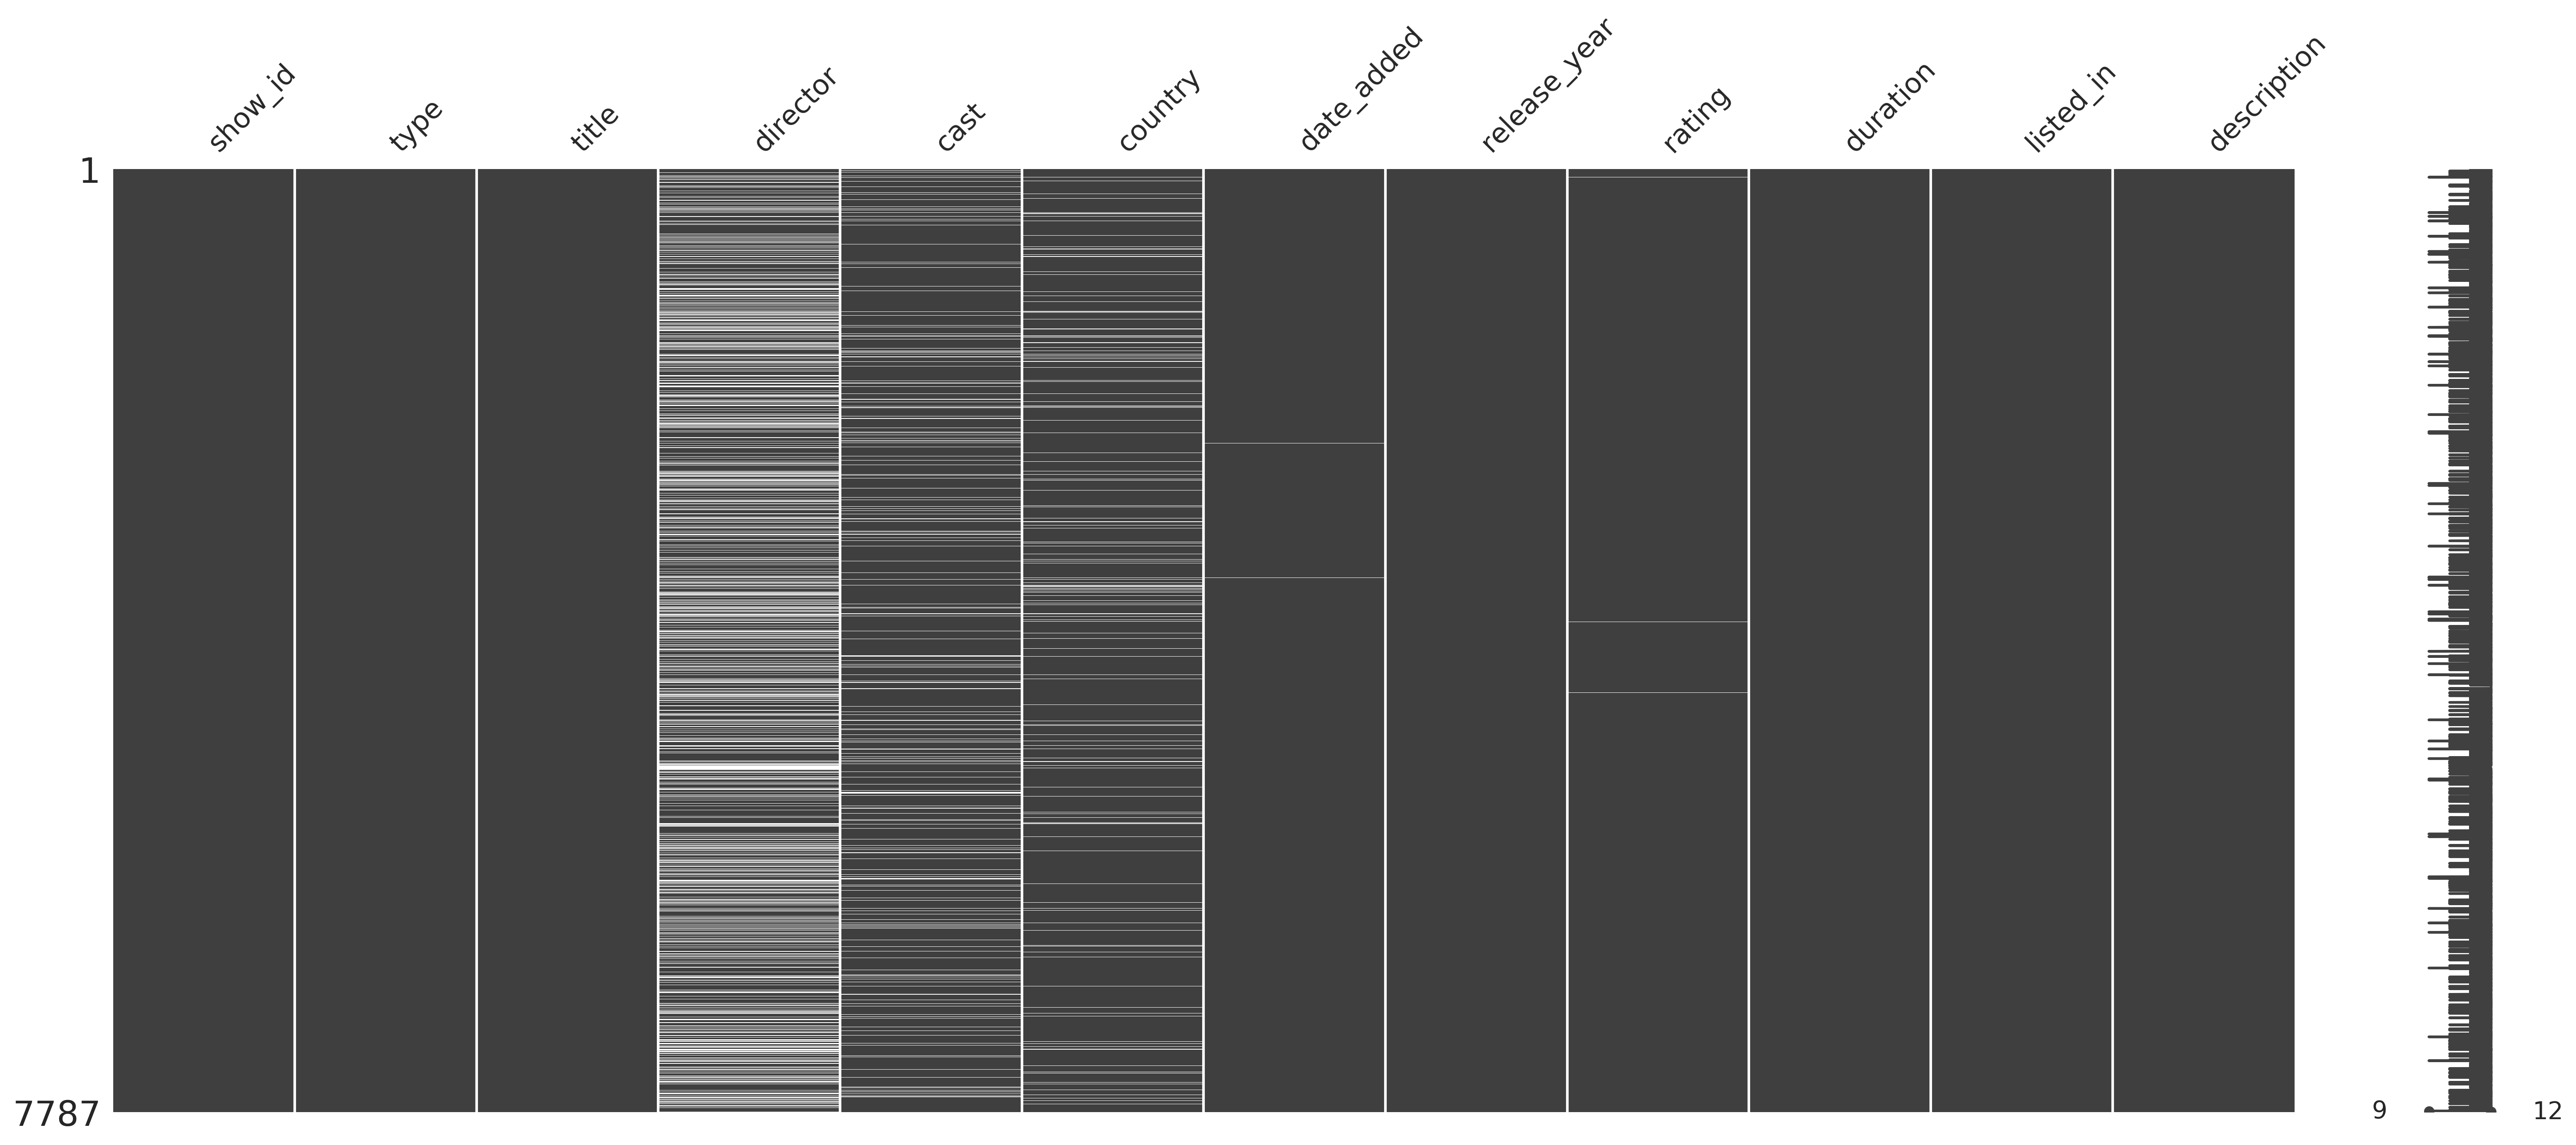

In [ ]:
msno.matrix(data)
plt.show()

In [ ]:
for i in data.columns:
    null_rate = data[i].isna().sum() / len(data) * 100
    if null_rate > 0 :
        print(f"{i}'s null rate : {null_rate}%")

director's null rate : 30.679337357133683%
cast's null rate : 9.220495697958135%
country's null rate : 6.51085141903172%
date_added's null rate : 0.1284191601386927%
rating's null rate : 0.08989341209708489%


There are 5837 videos, and each of them has 12 features.

`director`, `cast`, `country`

These 3 elements have a lot of null data.

- `director` : Only the director who has taken the most work seems to be able to visualize it separately.
- `cast` may be assumed to be zero if converted to number of people.
- `country` also seems to be classified as none.

---

Let's take a closer look at the data.

In [ ]:
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

Let's also take a quick look at the unique count and frequency.

In [ ]:
data.describe(include='all').head(4)

show_id   type    title                director                cast  \
count     7787   7787     7787                    5398                7069   
unique    7787      2     7787                    4049                6831   
top      s3973  Movie  Frasier  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377        1                      18                  18   

              country       date_added  release_year rating  duration  \
count            7280             7777        7787.0   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  A surly septuagenarian gets another chance at ...  
freq              334                                                  3

First of all, `show_id` and `descroption` do not seem to have anything to visualize right now.

With `show id`, you can EDA the characteristics of the show id and the elements of the movie.
The `description` may be visualized by country differences, year differences or word clouds.


In [ ]:
data = data.fillna('NULL')
data['year_added'] = data['date_added'].apply(lambda x :  x.split(',')[-1])
data['year_added'] = data['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
data['year_added'] = data['year_added'].apply(int)

For analysis, make `movie` data & `TV Show` data.

In [ ]:
movie = data[data['type'] == 'Movie']
tv_show = data[data['type'] == 'TV Show']

## Why Netflix's Video Count Soared?

It is clear that Netflix is ​​now the largest company in the field of film / drama.

This time, let's take a look at how Netflix grew and how it looks like data. With *data from the wiki*

- [Neflix(wiki)](https://en.wikipedia.org/wiki/Netflix)
- [Timeline of Netflix](https://en.wikipedia.org/wiki/Timeline_of_Netflix)

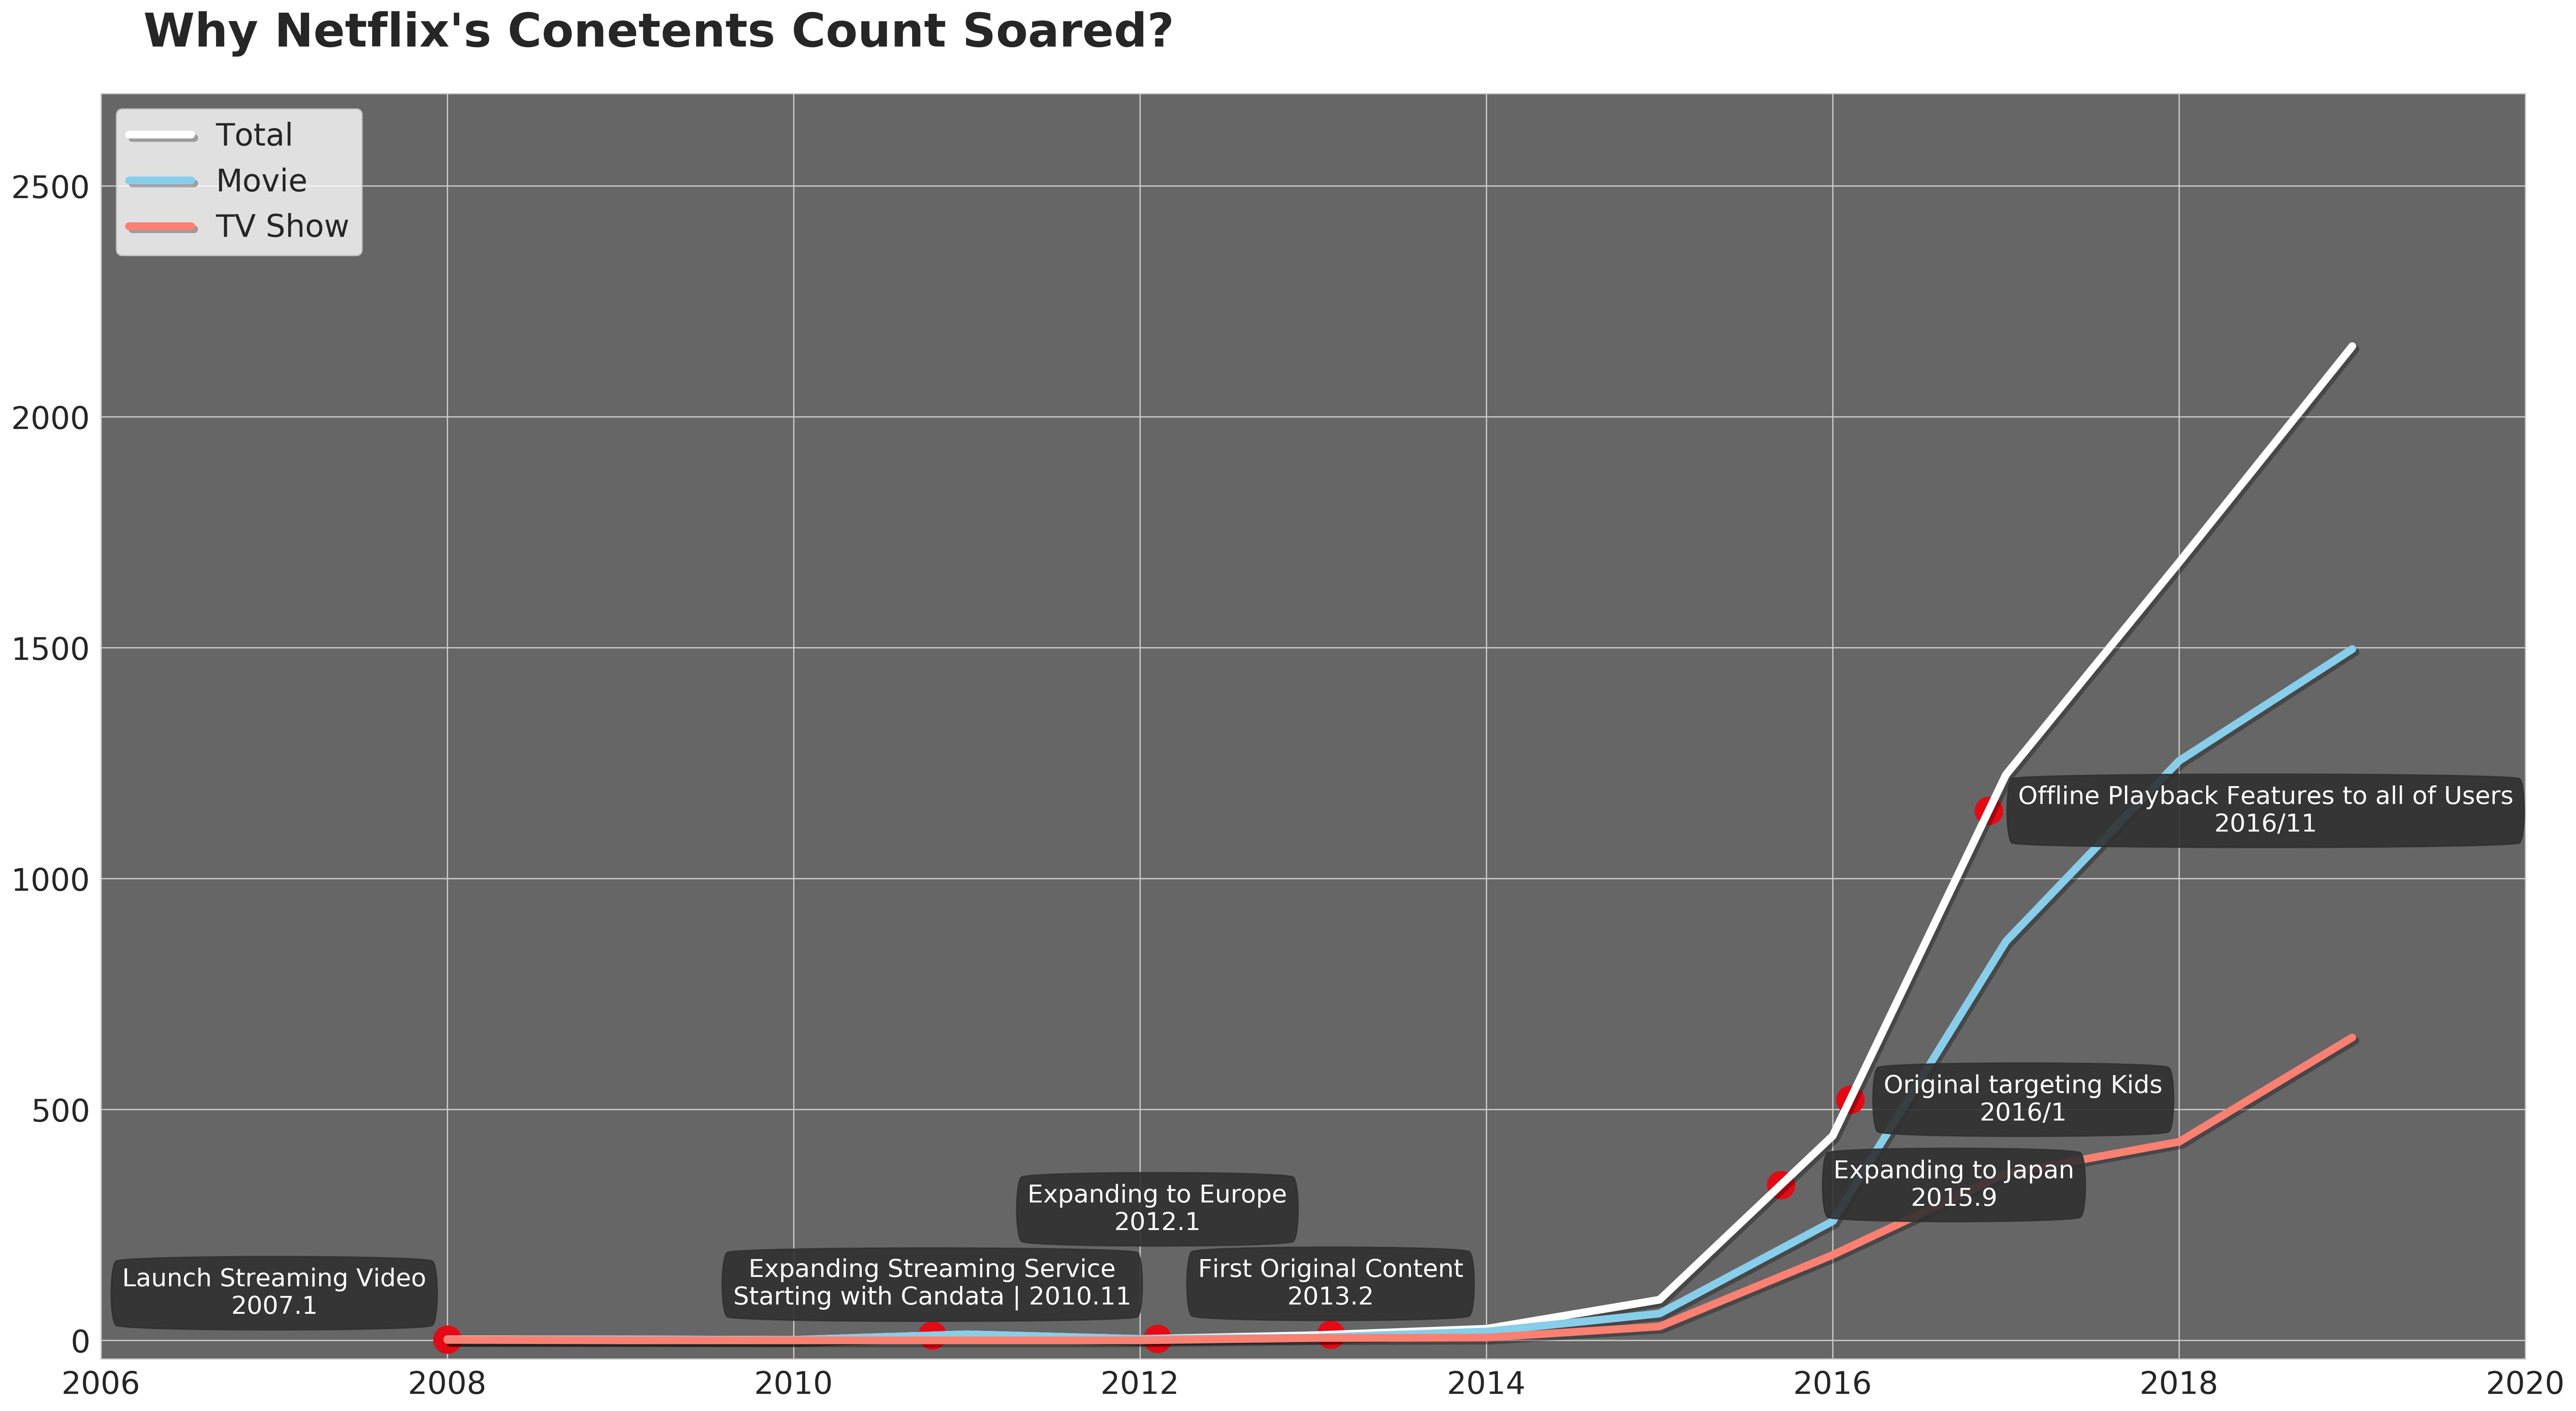

In [ ]:
import matplotlib.patheffects as path_effects
year_data = data['year_added'].value_counts().sort_index().loc[:2019]
type_data = data.groupby('type')['year_added'].value_counts().sort_index().unstack().fillna(0).T.loc[:2019]

fig, ax = plt.subplots(1,1, figsize=(28, 15))
ax.plot(year_data.index, year_data,  color="white", linewidth=5, label='Total', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['Movie'], color='skyblue', linewidth=5, label='Movie', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['TV Show'], color='salmon', linewidth=5, label='TV Show', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

ax.set_xlim(2006, 2020)
ax.set_ylim(-40, 2700)

t = [
    2008,
    2010.8,
    2012.1,
    2013.1,
    2015.7,
    2016.1,
    2016.9
]

events = [
    "Launch Streaming Video\n2007.1",
    "Expanding Streaming Service\nStarting with Candata | 2010.11",
    "Expanding to Europe\n2012.1",
    "First Original Content\n2013.2",
    "Expanding to Japan\n2015.9",
    "Original targeting Kids\n2016/1",
    "Offline Playback Features to all of Users\n2016/11"
]

up_down = [100, 110, 280, 110, 0, 0, 0]

left_right = [ -1, 0, 0, 0, 1, 1, 1.6 ]

for t_i, event_i, ud_i, lr_i in zip(t, events, up_down, left_right):
    ax.annotate(event_i,
                xy=(t_i + lr_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)) + ud_i),
                xytext=(0,0), textcoords='offset points',
                va="center", ha="center",
                color="w", fontsize=16,
                bbox=dict(boxstyle='round4', pad=0.5, color='#303030', alpha=0.90))

    # A proportional expression to draw the middle of the year
    ax.scatter(t_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)), color='#E50914', s=300)

ax.set_facecolor((0.4, 0.4, 0.4))
ax.set_title("Why Netflix's Conetents Count Soared?", position=(0.23, 1.0+0.03), fontsize=30, fontweight='bold')
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
plt.legend(loc='upper left', fontsize=20)

plt.show()

Everyone knows the tremendous growth since the launch of the streaming service.

You can see this growth only by looking at the content of the `data_add`.

Whenever they go overseas, they have added the country's content to Netflix and can assume that the content continues to be produced with positive feedback.

---

And the number of movies decreases, the TV show increases, and you can see that each number is reversed.

Now let's take a look at which country produces such a movie or TV show.

## Which country produces the most Contents?

Now it would be nice to compare them by country.

We need to count the countries, but first I need to preprocess the data inside the `country` columns.

And this time, let's see how we can represent the graph of this comparison.

In [ ]:
from collections import Counter
country_data = data['country']
country_counting = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
country_counting.drop(['NULL'], axis=0, inplace=True)

> Let's count on the other side for a moment, and using the **[Pareto principle(80/20 rule)](https://en.wikipedia.org/wiki/Pareto_principle)** can help you visualize your data.

In [ ]:
tot = sum(country_counting)
top20 = sum(country_counting[:20]) # 22 is real 20% but for simple processing

print(f'total : {tot}')
print(f'top 20 countries : {top20}')
print(f'percentage : {top20}/{tot} = {100 * top20/tot}')

total : 9067
top 20 countries : 7879
percentage : 7879/9067 = 86.8975405315981


So this time, let's visualize only the top 20 countries.

### Bar Plot & Pie Plot

Bar graphs are the most powerful tool.

It can be eaten now, but the history is not so long and it is said to have been made around the 18th century. And it was one of the best technologies at that time. ([wiki](https://en.wikipedia.org/wiki/Bar_chart))

In [ ]:
top20_country = country_counting[:20]

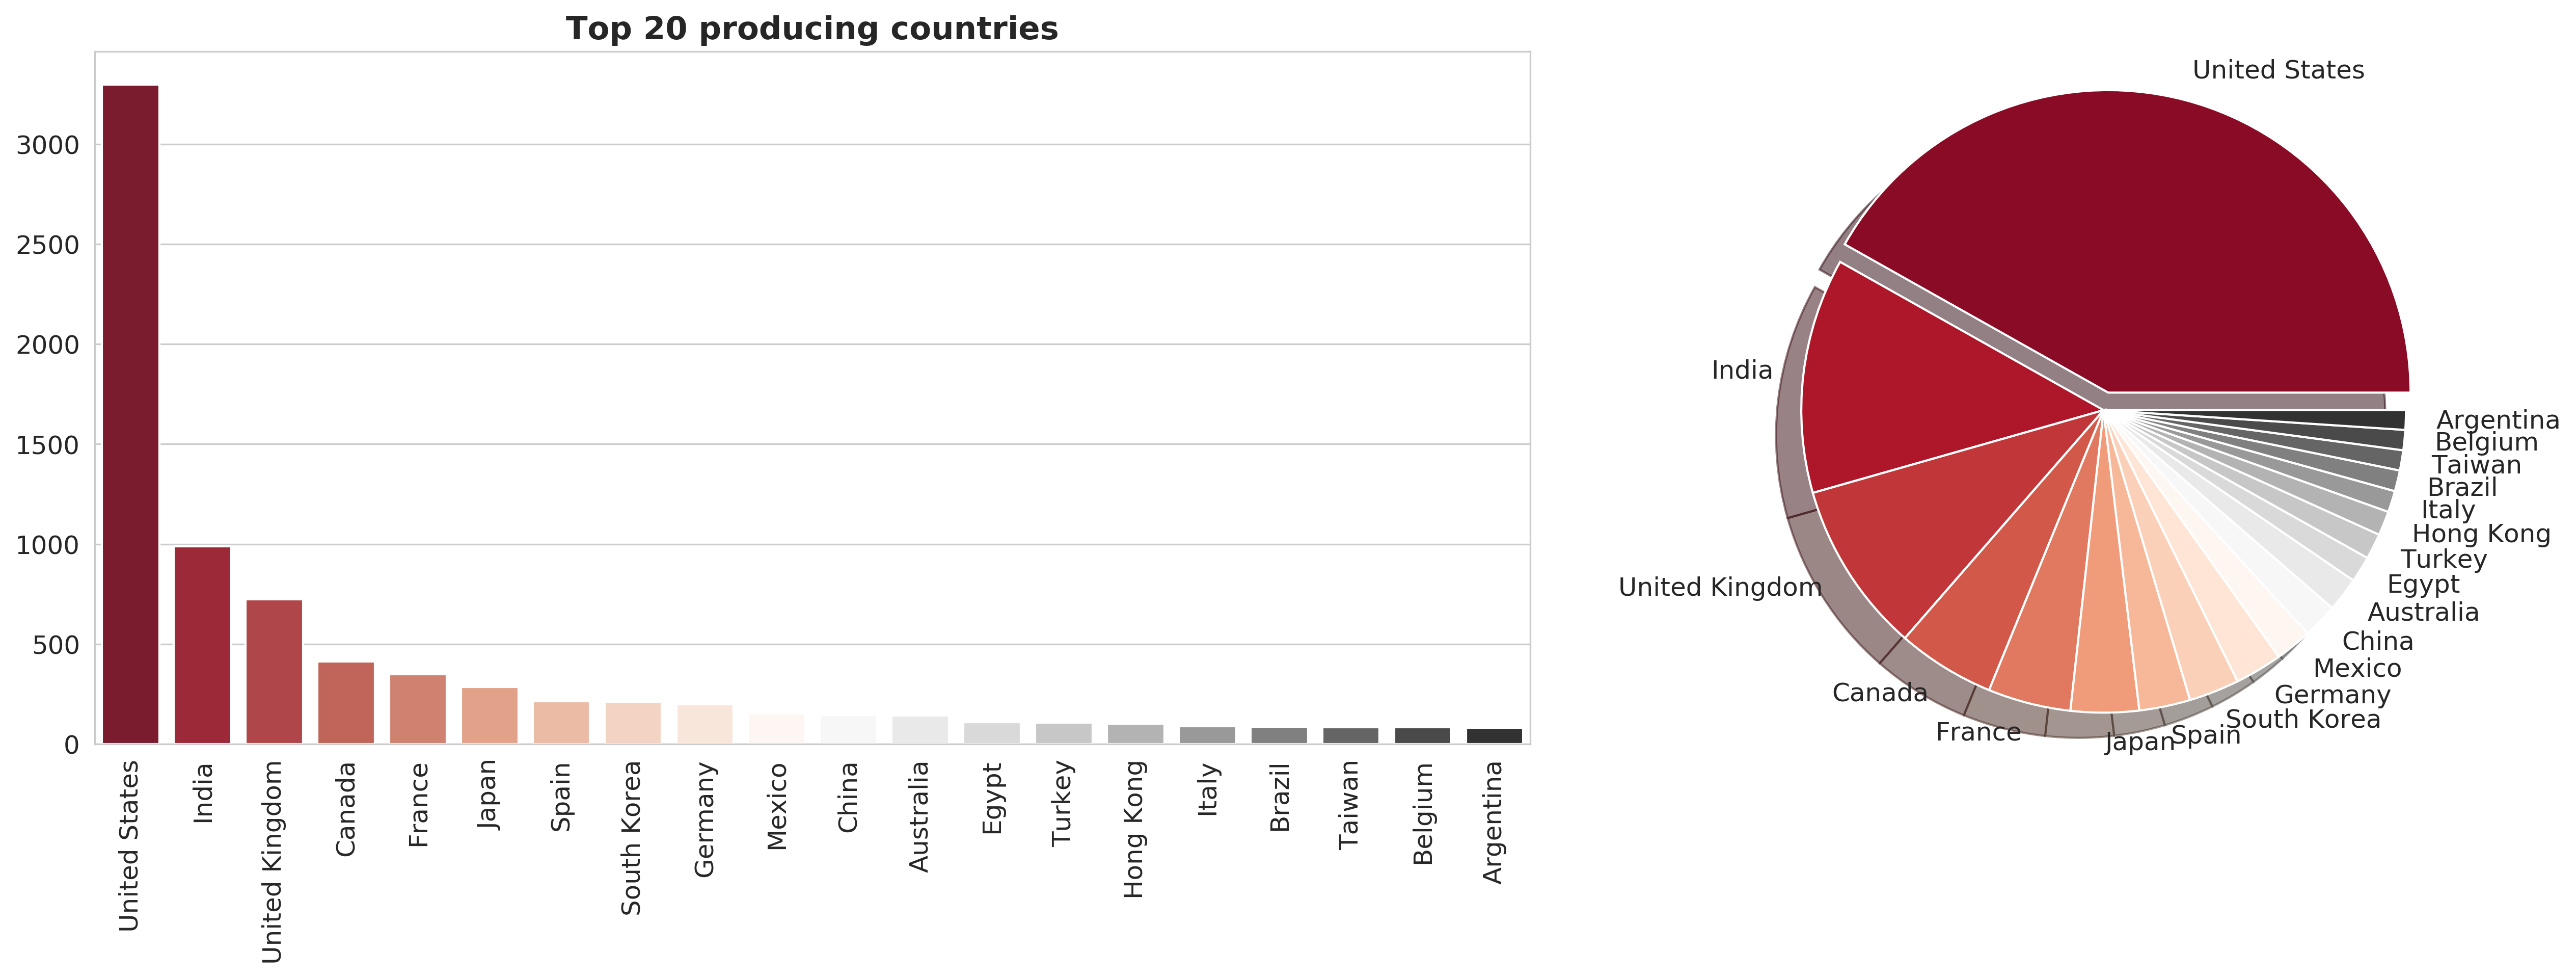

In [ ]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                       height_ratios=[6],
                       width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top20_country.index, top20_country, ax=ax, palette="RdGy")
ax.set_xticklabels(top20_country.index, rotation='90')
ax.set_title('Top 20 producing countries', fontsize=15, fontweight='bold')

explode = [0 for _ in range(20)]
explode[0] = 0.06

ax2 = plt.subplot(gs[1])
ax2.pie(top20_country, labels=top20_country.index,
        shadow=True, startangle=0, explode=explode,
        colors=sns.color_palette("RdGy", n_colors=20)
       )
ax2.axis('equal')

plt.show()

Clearly, you can see that the US is close to 40%.

### TreeMap | Waffle (Mosaic plot)

One of the visualization algorithms from the 1990s. While mosaic plots are among the most basic tiling algorithms, there are no visualizations based on python.

Treemaps are better suited for structural tree data, but they can also be used for large comparisons.

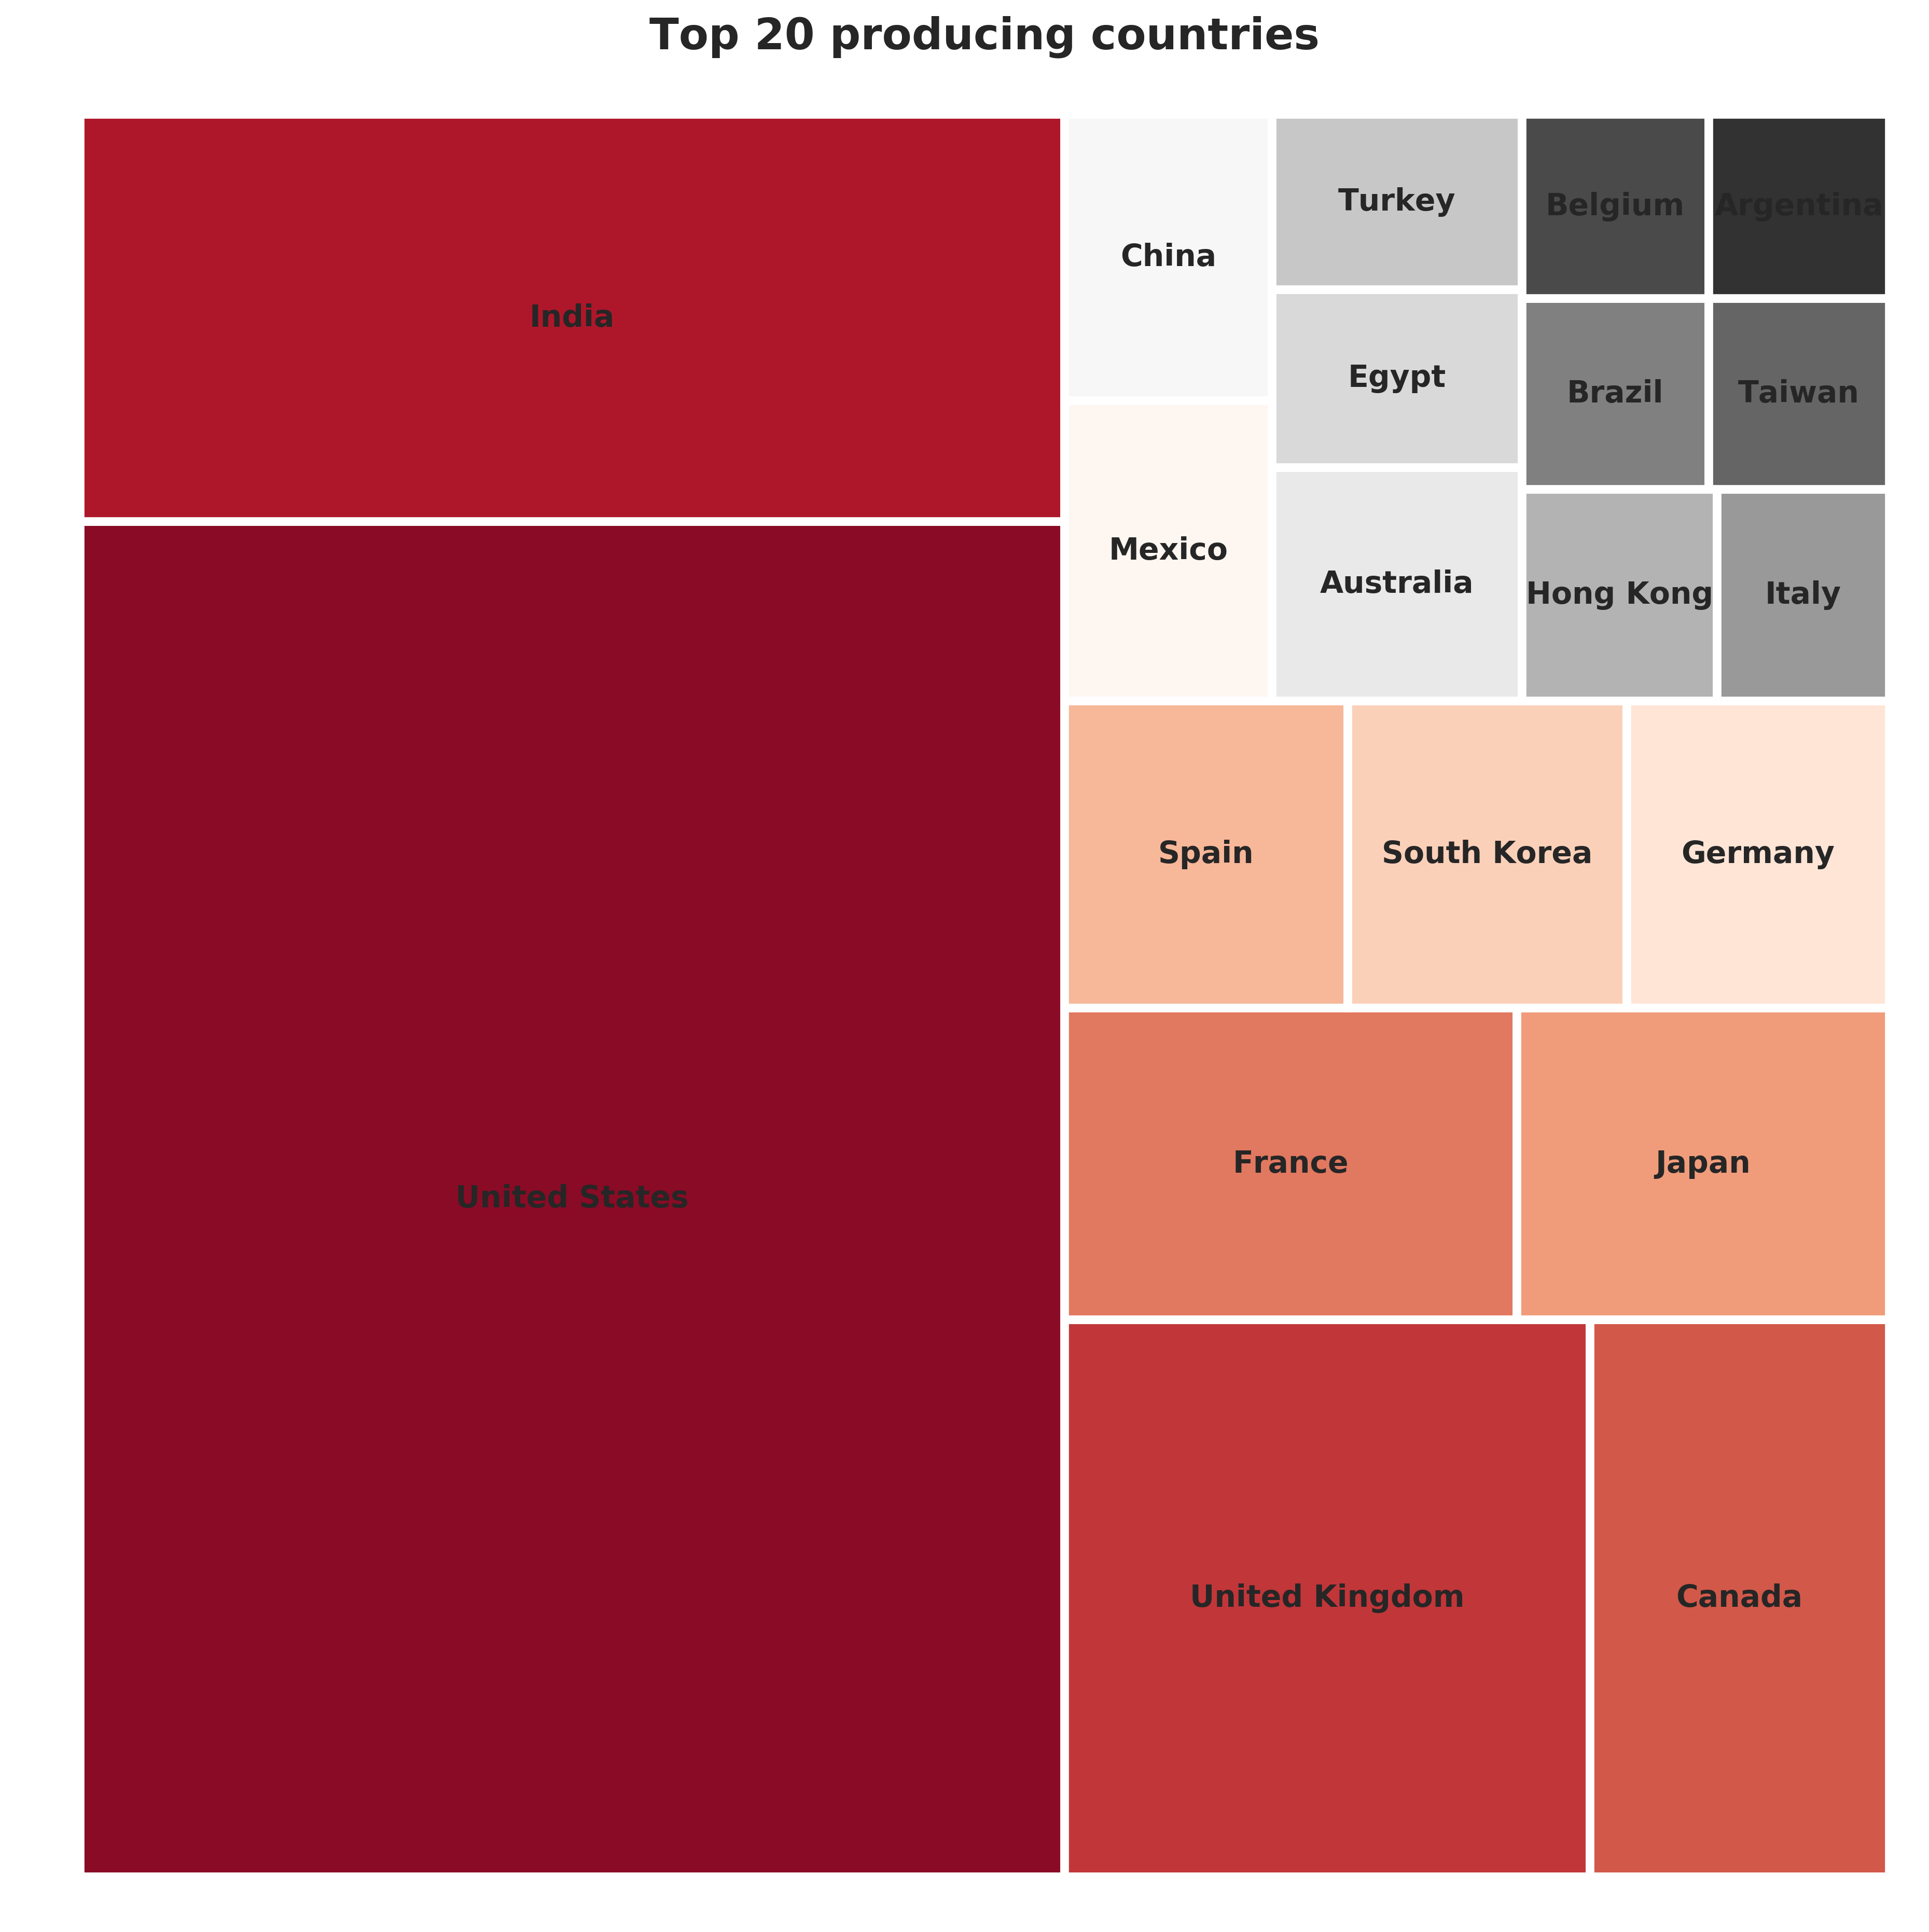

In [ ]:
import squarify

y = top20_country
fig = plt.figure(figsize=(15, 15))
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("RdGy", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 20 producing countries', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

Clearly, the United States is the beginning, and as a content powerhouse, it accounts for 40% of the top 20.

Canada is at the top of the list as it spread through Canada.

China is probably banned, or know that it is developing and using its own app, so the number itself is very small.

Probably, if you draw a rough graph of country population, you'll get a more meaningful graph.

---

If you want to draw something similar to a mosaic graph, it is recommended to draw a waffle chart. The graph is shown below.

In [ ]:
!pip install pywaffle
from pywaffle import Waffle

     |████████████████████████████████| 532kB 1.2MB/s 


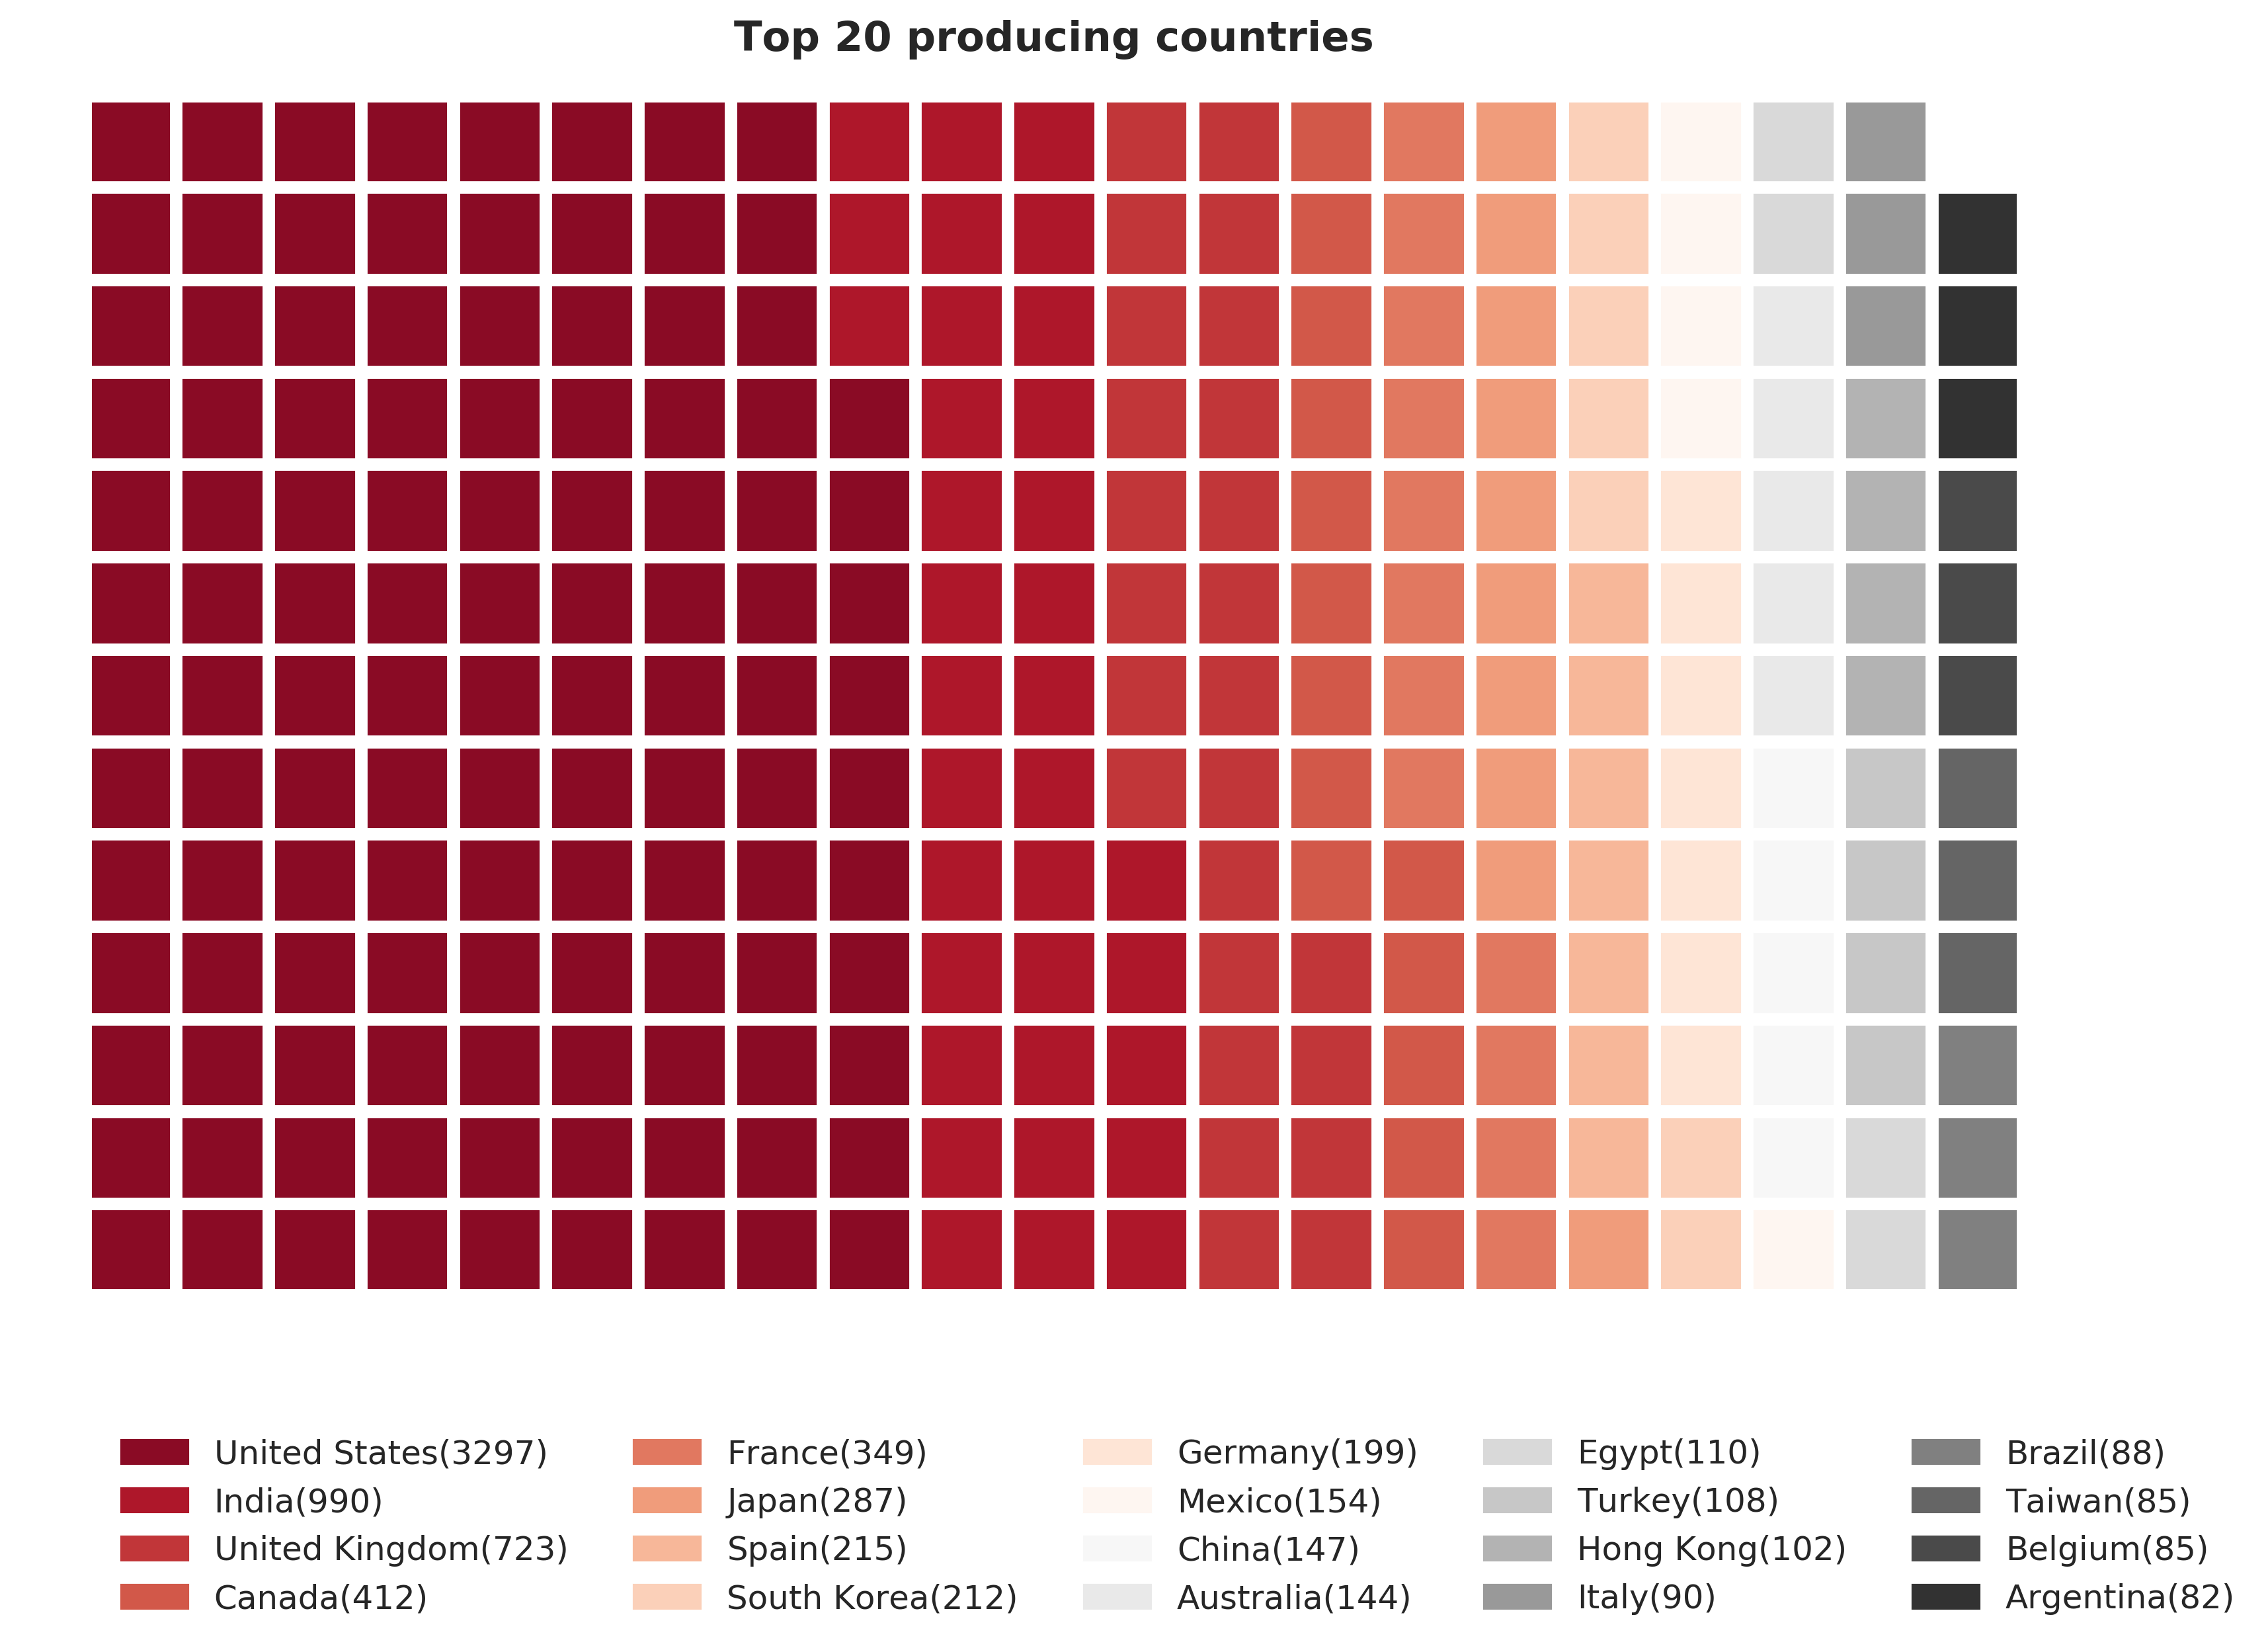

In [ ]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=13,
    columns=21,
    values=y,
    labels=["{}({})".format(a, b) for a, b in zip(y.index, y) ],
    colors=sns.color_palette("RdGy", n_colors=20),
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.3), 'ncol': len(y)//4,  'framealpha': 0},
    font_size=15,
    figsize=(12, 12),
    icon_legend=True
)

plt.title('Top 20 producing countries', position=(0.5, 1.0+0.03), fontsize = 15, fontweight='bold')
plt.show()

Matched colors for consistency with the previous content.

> (It was 80/20 from above, but in fact, the ratio of red seems to be 90/10.)

However, it is important to be able to distinguish colors differently because they are not distinguishable.

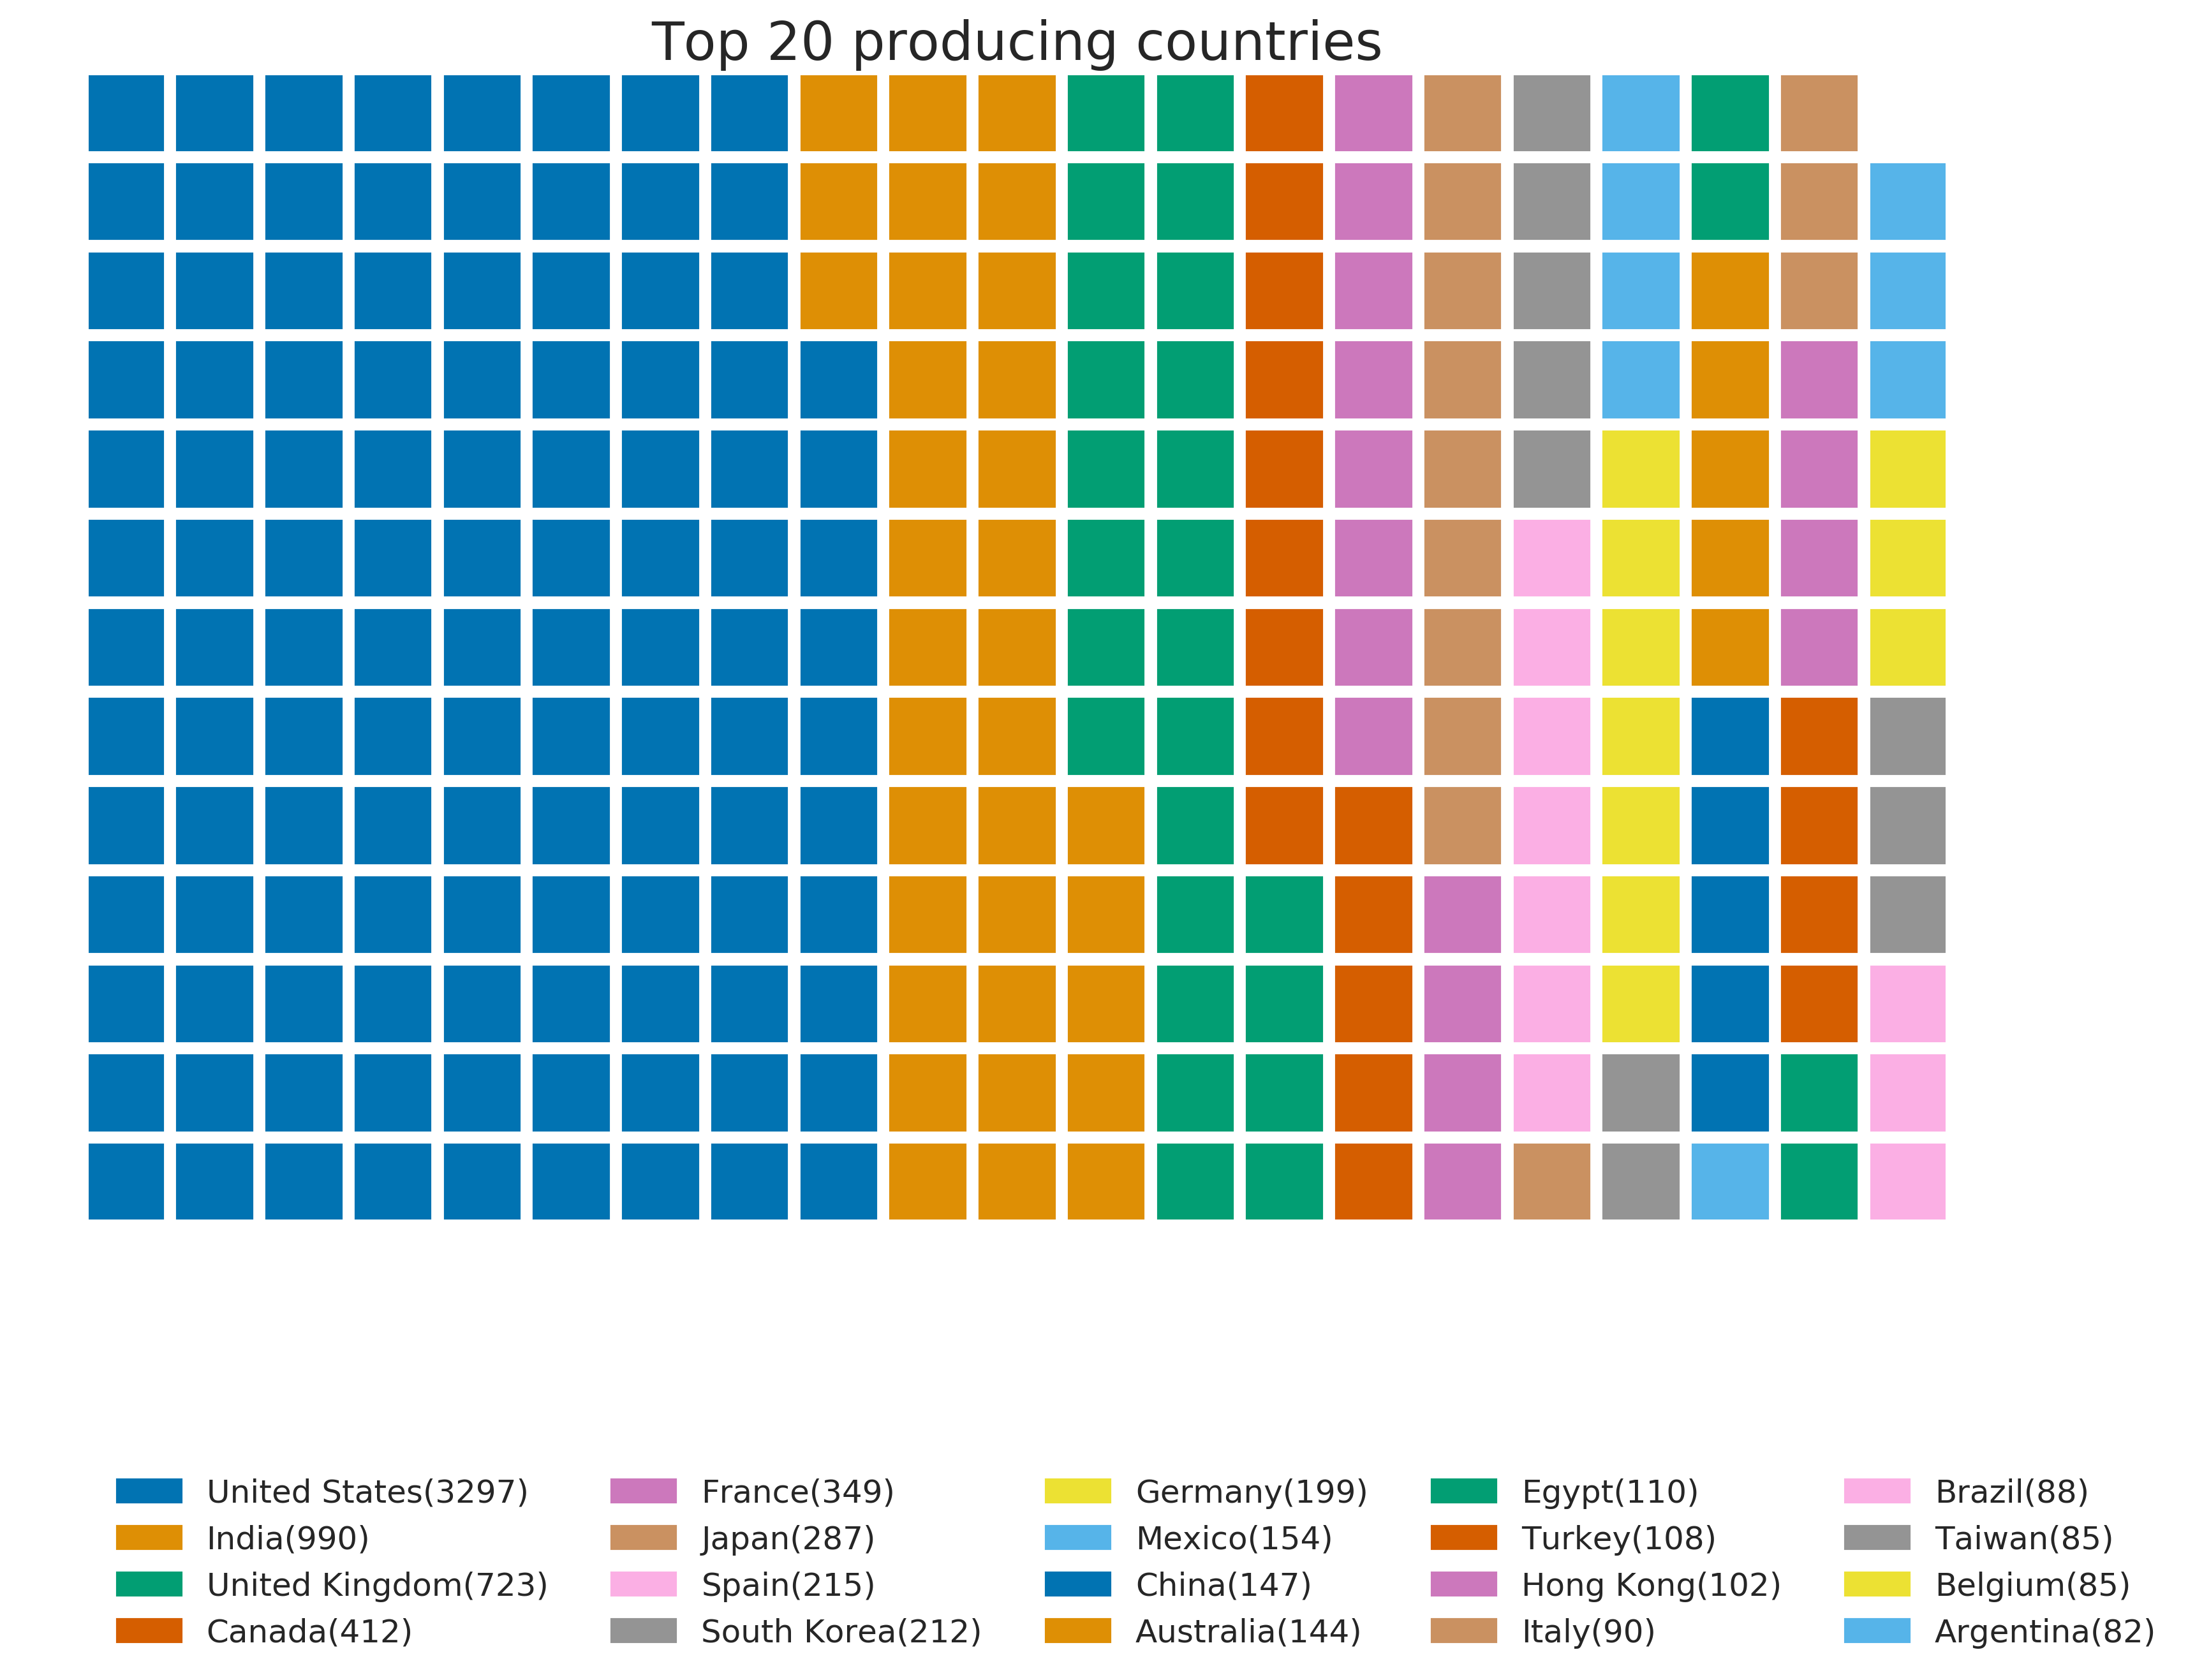

In [ ]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=13,
    columns=21,
    values=y,
    labels=["{}({})".format(a, b) for a, b in zip(y.index, y) ],
    colors=sns.color_palette("colorblind", n_colors=20),
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(y)//4,  'framealpha': 0},
    font_size=20,
    figsize=(12, 12),
    icon_legend=True
)

plt.title('Top 20 producing countries', fontsize = 20)
plt.show()

## Comparison by country for time

For a more interesting visualization, let's consider the `year` by `country` feature.

In [ ]:
import altair as alt
alt.renderers.enable('kaggle')

RendererRegistry.enable('kaggle')

In [ ]:

data['country'] = data['country'].dropna().apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
lst_col = 'country'
data2 = pd.DataFrame({
      col :  np.repeat(data[col].values, data[lst_col].str.len())
      for col in data.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(data[lst_col].values)})[data.columns.tolist()]


In [ ]:
year_country = data2.groupby('year_added')['country'].value_counts().reset_index(name='counts')
year_country['top20'] = year_country['country'].apply(lambda x : x in top20_country.index)

year_country = year_country[(year_country['year_added'] >= 1990) & year_country['top20'] & (year_country['year_added'] < 2020)]

alt.Chart(year_country).mark_area().encode(
    alt.X('year_added'),
    alt.Y('counts:Q', stack='center', axis=None),
    alt.Color('country:N',
        scale=alt.Scale(scheme='redgrey'),
        sort=list(top20_country.index)
    ),
).properties(
    height=350,
    width=600
)

alt.Chart(...)

We call this graph a `streamgraph`. It has the advantage of being able to express the overall distribution, but no specific comparison is possible.

It's clearer that it's soared between `2015` and `2016`.

For an accurate comparison, you can compare by percentage and visualize it as follows.

In [ ]:
alt.Chart(year_country).mark_area().encode(
    alt.X('year_added'),
    alt.Y('counts:Q', stack='normalize'),
    alt.Color('country:N',
        scale=alt.Scale(scheme='redgrey'),
        sort=list(top20_country.index)
    ),
).properties(
    height=350,
    width=600
)

alt.Chart(...)

Clearly, the **United States, India, and the United Kingdom** have a high percentage of content. (redddddd)

Using the time element, we can also express it on the map as follows:

In [ ]:
import plotly.express as px
year_country2 = data2.groupby('year_added')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country2, locations="country", color="counts",
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Comparison by country')
fig.show()

Obviously looking at year_added over time, we can see where the export is going.

## Movie & TV show (Genre)

First, let's check the relationship between each genre by movie and TV show.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding

def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print(f"There are {len(Types)} types in the Netflix {title} Dataset")
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 14))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})

    plt.show()

### Movie Genre Relatation

There are 20 types in the Netflix Movie Dataset


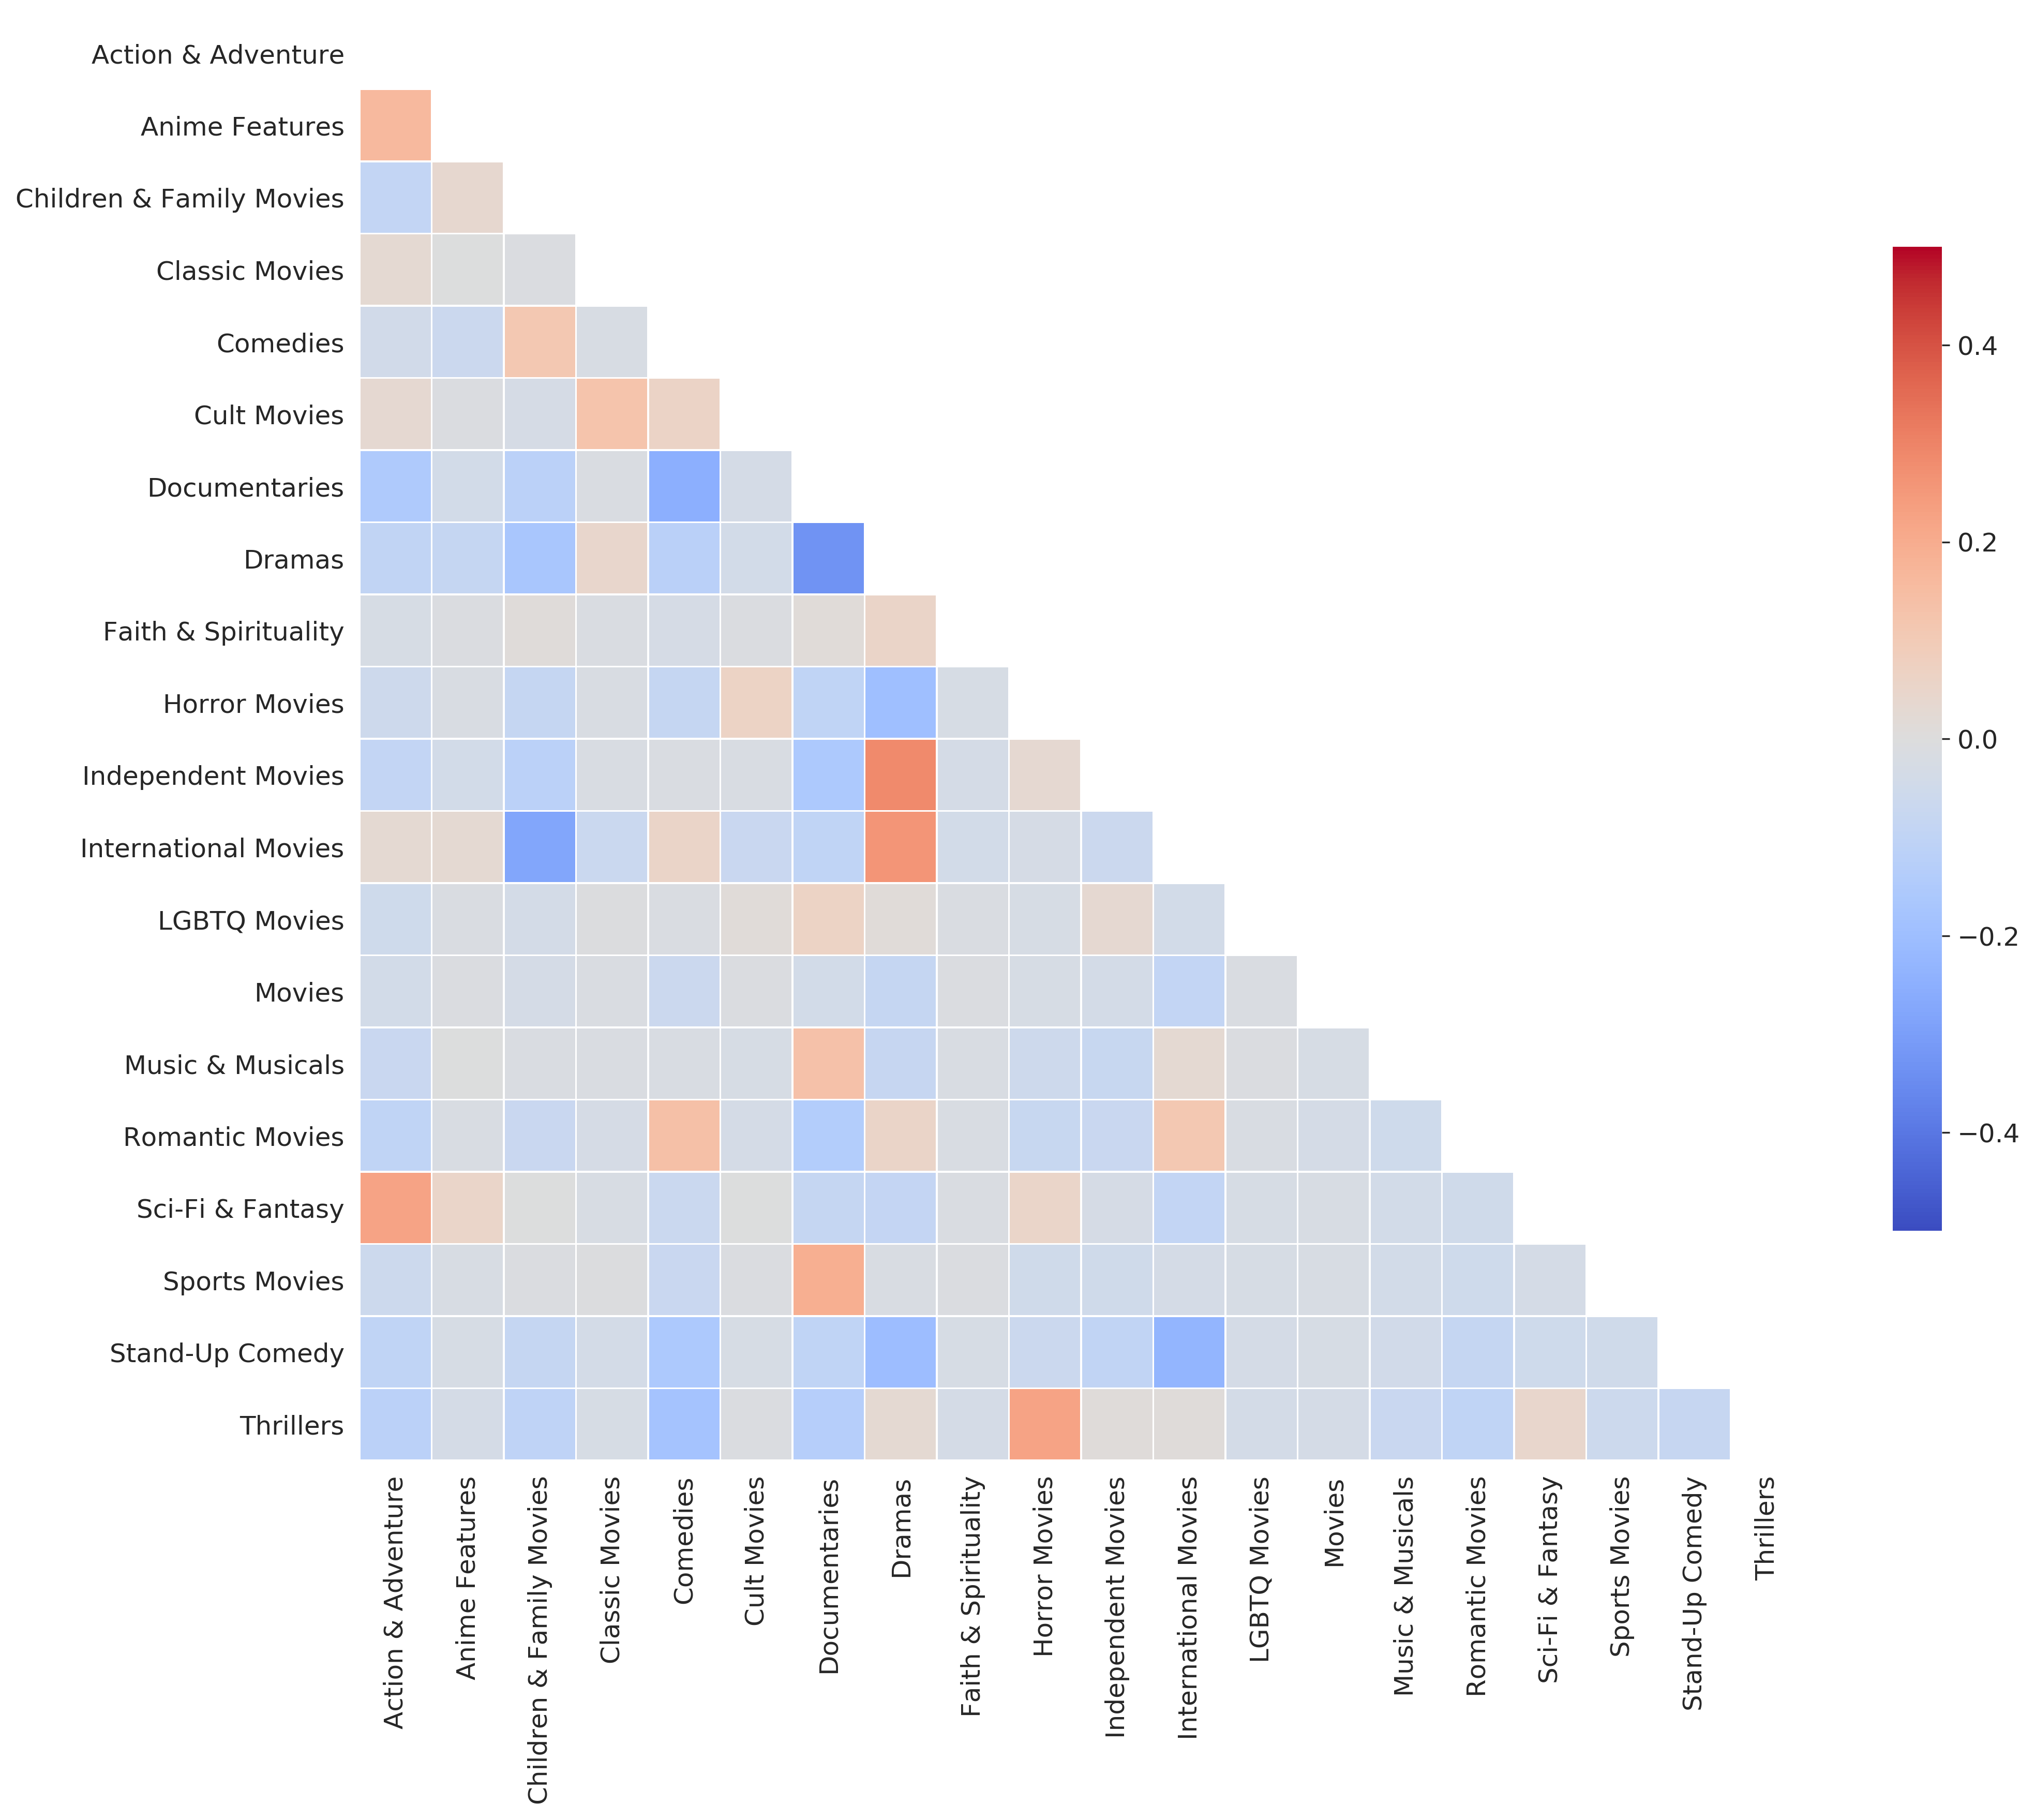

In [ ]:
relation_heatmap(movie, 'Movie')

In film, the negative relationship between drama and documentary is remarkable. You can also see that there are many dramas for independent and international films.

### TV Show Genre Relation

There are 22 types in the Netflix TV Show Dataset


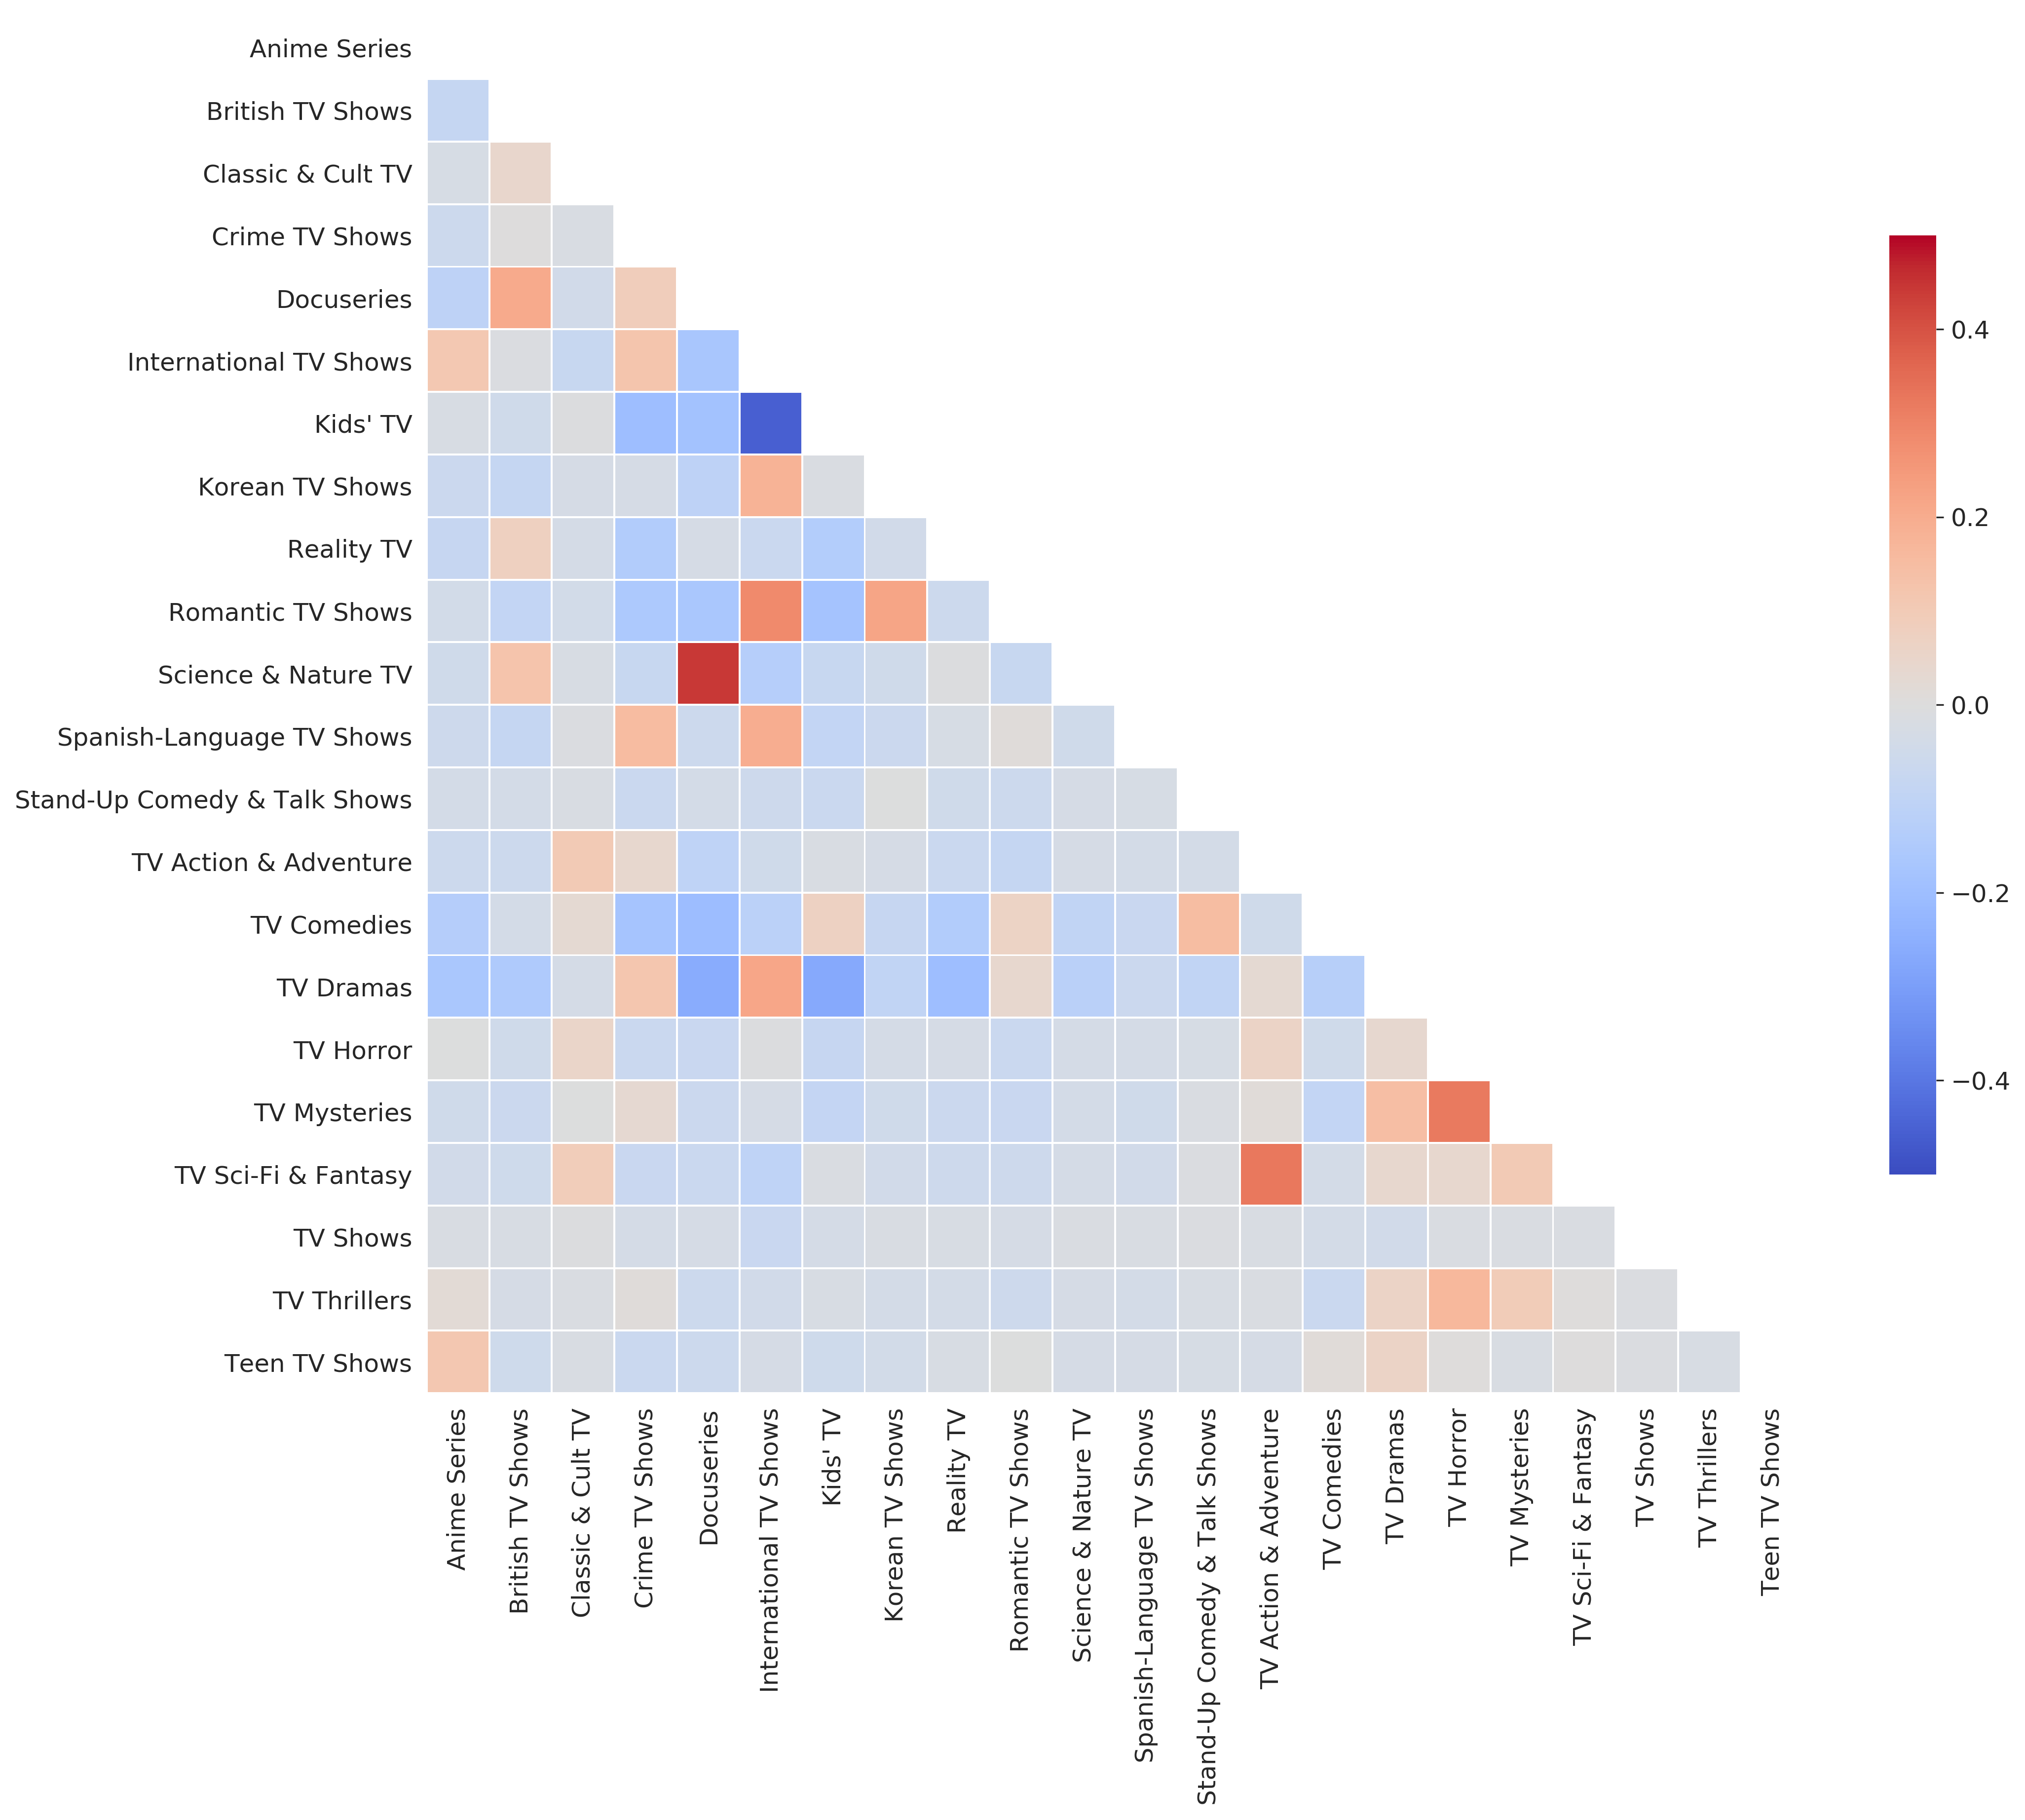

In [ ]:
relation_heatmap(tv_show, 'TV Show')

TV shows are more clearly correlated than movies.

The most obvious is the relationship between **kids and International** (*Could it be that kids' content is important to their culture?*), **Science & Natural and Docuseries**.



## Rating Distribution

- [How does Netflix decide the maturity rating on TV shows and movies? (USE ver.)](https://help.netflix.com/en/node/2064/us)

> Each TV show and movie on Netflix is assigned a maturity rating to help members make informed choices for themselves and their children. Maturity ratings are either determined by Netflix or by a local standards organization. Netflix determines maturity ratings by the frequency and impact of mature content in a TV show or movie. TV show ratings reflect the overall maturity level of the whole series.


|Little Kids | Older Kids | Teens | Mature|
|-|-|-|-|
|G, TV-Y, TV-G | PG, TV-Y7, TV-Y7-FV, TV-PG | PG-13, TV-14 | R, NC-17, TV-MA|

---

### Rating System

>  [Motion Picture Association of America film rating system](https://en.wikipedia.org/wiki/Motion_Picture_Association_of_America_film_rating_system)

|Rating|Meaning|
|-|-|
|G|General Audiences|
|PG|Parental Guidance Suggested|
|PG-13|Parents Stongly Cautioned|
|R|Restricted|
|NC-17|Adults Only|



In [ ]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

movie_rating = movie['rating'].value_counts()[rating_order]
tv_rating = tv_show['rating'].value_counts()[rating_order].fillna(0)

In [ ]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

### Movie Rating

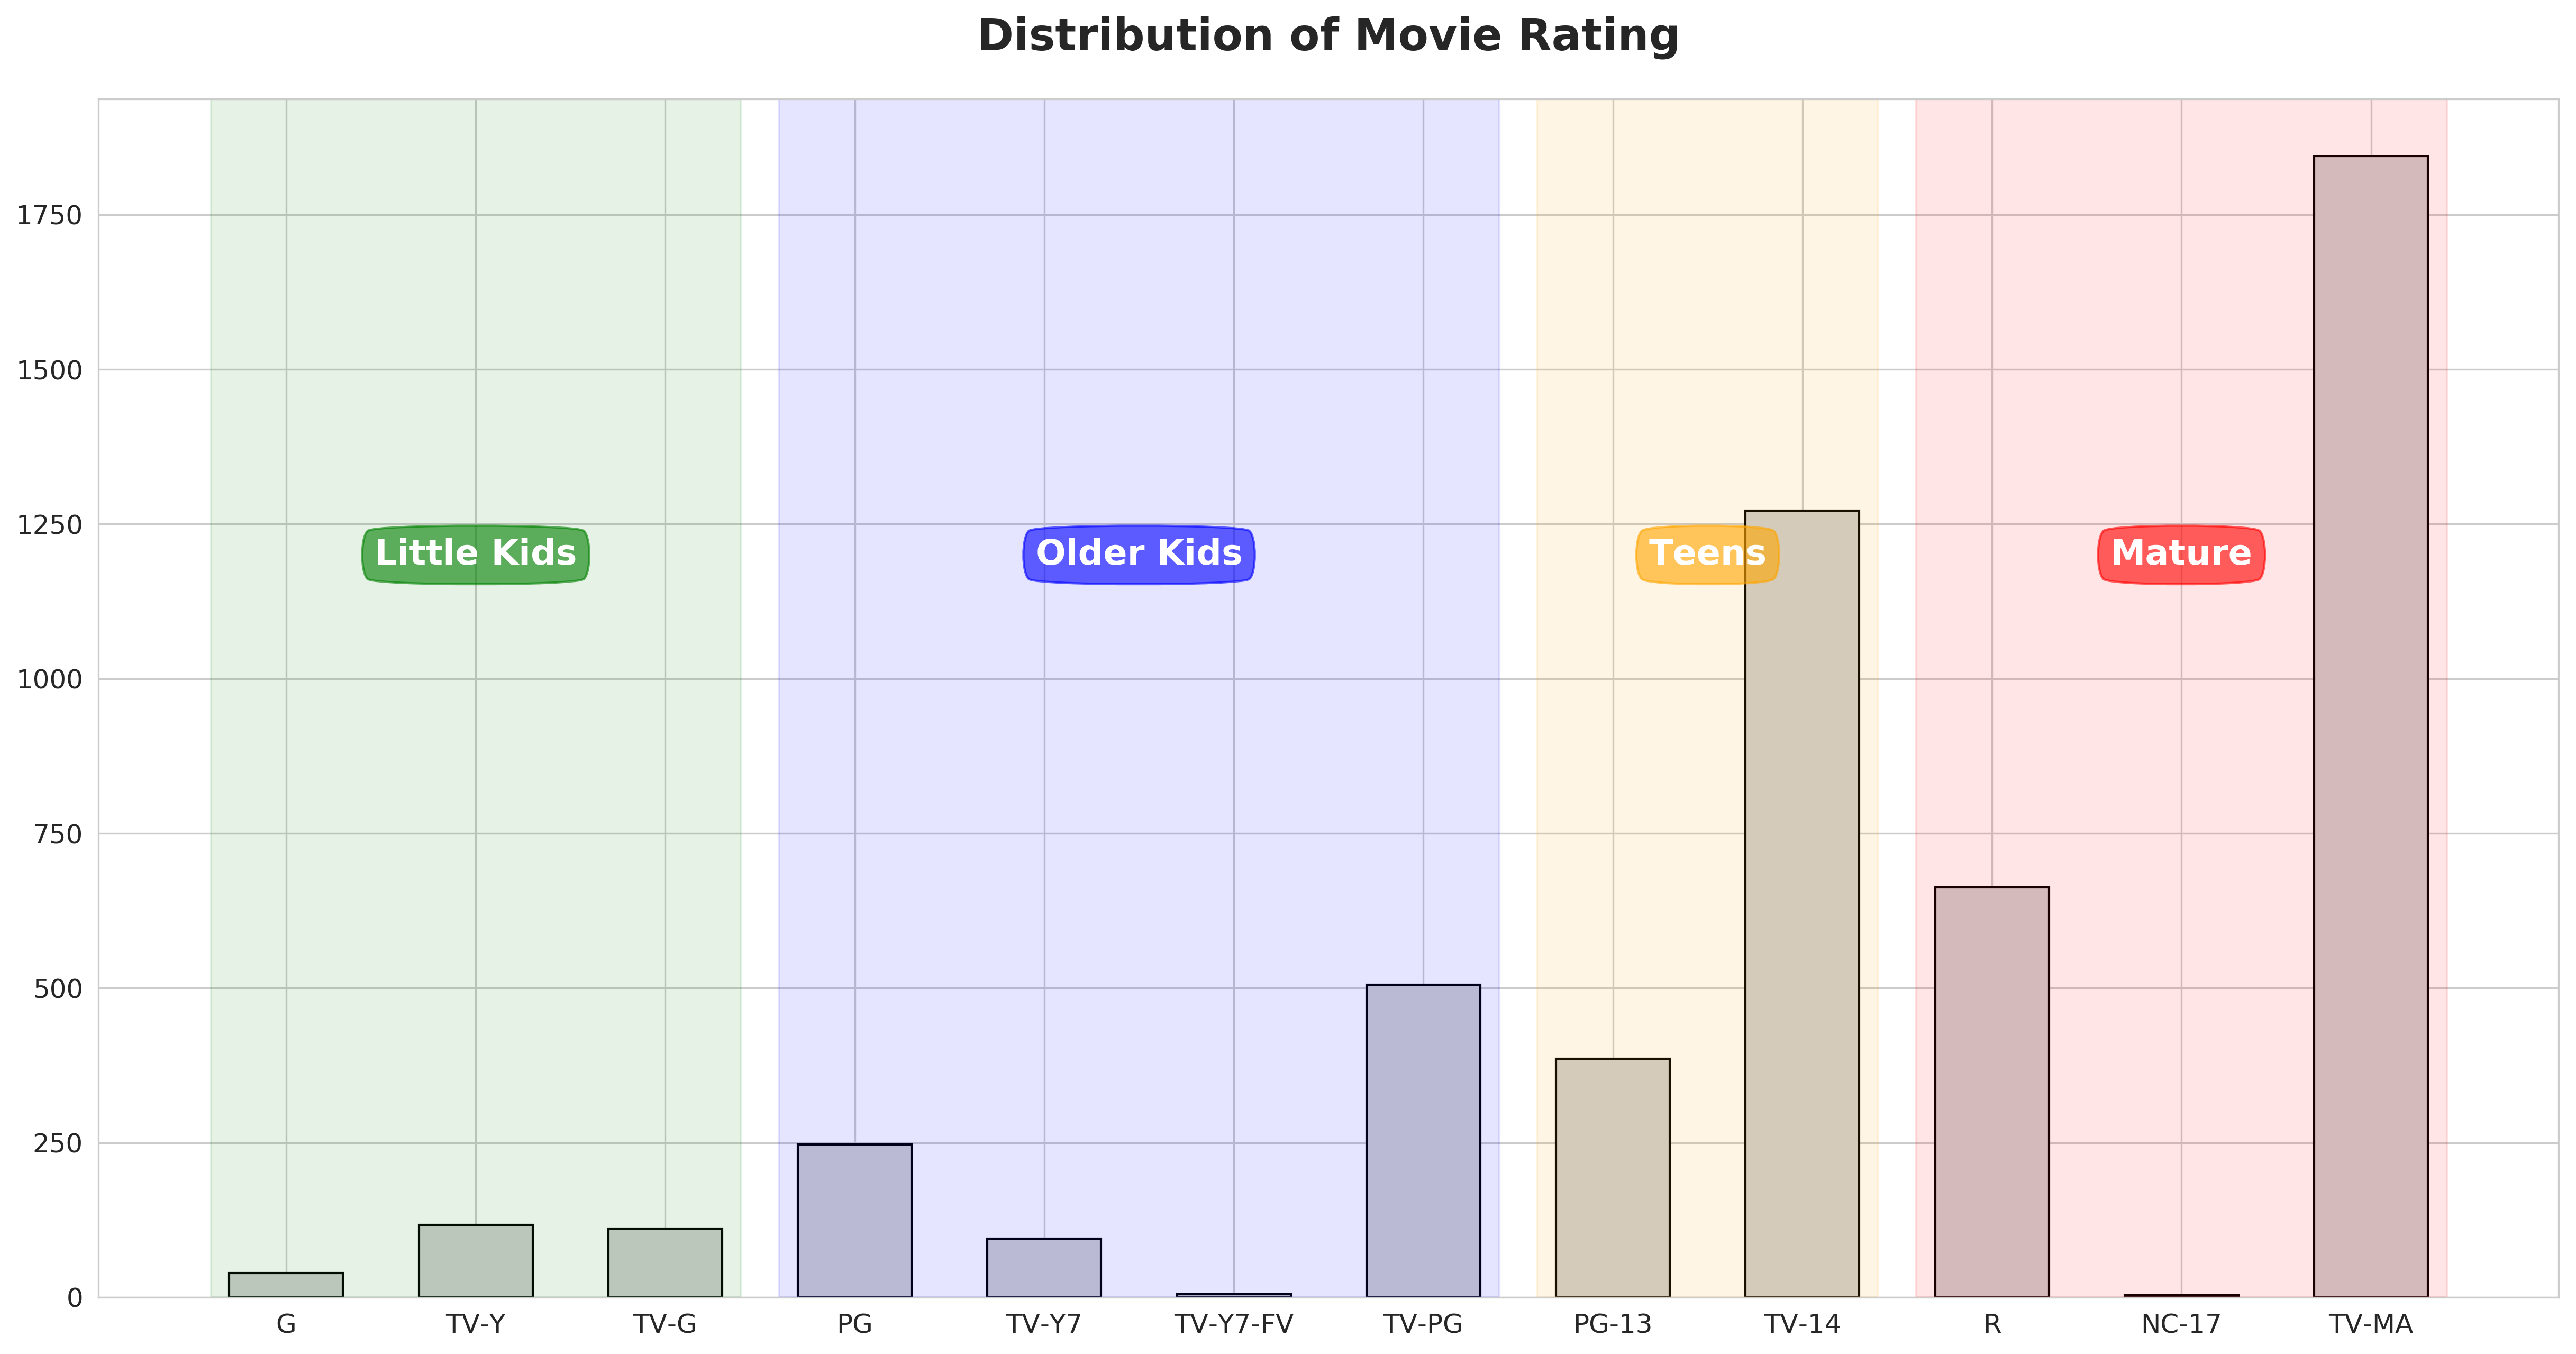

In [ ]:
rating_barplot(movie_rating,'Movie', 1200)

### TV Show Rating

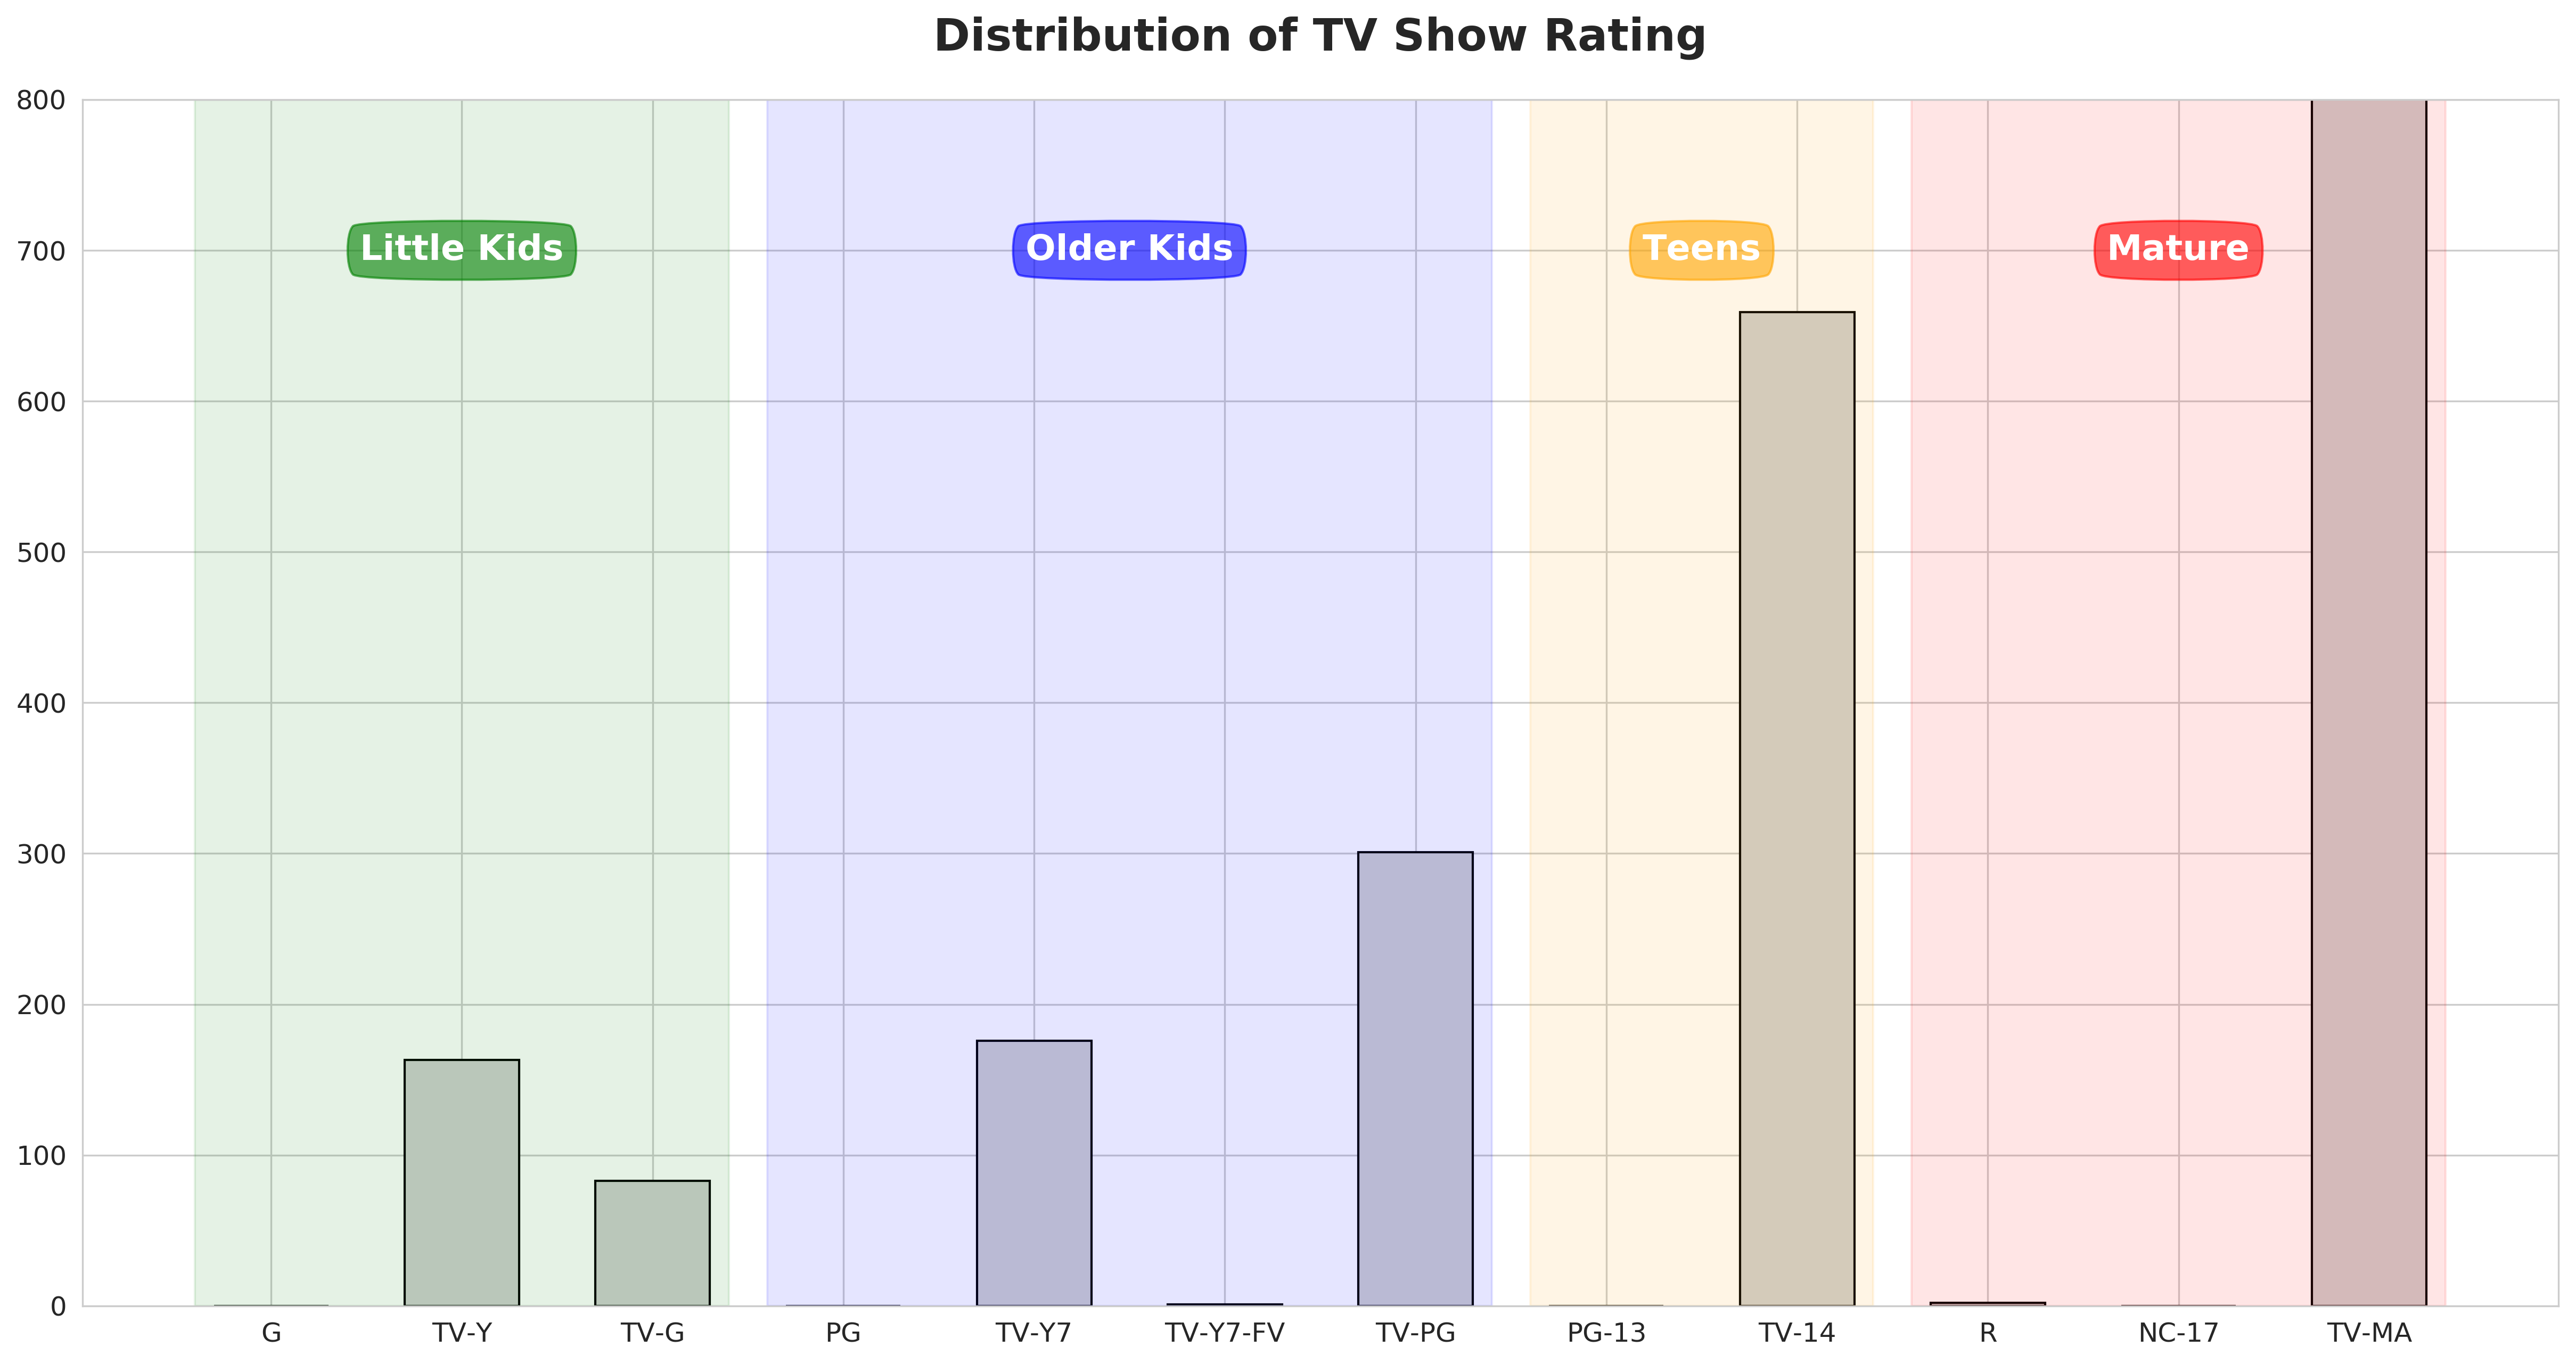

In [ ]:
rating_barplot(tv_rating,'TV Show' , 700, 800)

Certainly the TV Show is more for young children. Perhaps more so with the introduction of netflix on home TVs.

Lets look at the ratio on a similar scale.

In [ ]:
rating_data = data[['rating', 'type']].groupby('type')['rating'].value_counts().unstack().fillna(0)[rating_order].T
rating_data = pd.DataFrame(pd.concat([rating_data['Movie'], rating_data['TV Show']])).reset_index().rename(columns={'rating':'rating',0:'cnt'})
rating_data['type'] = rating_data.index//12

In [ ]:
data['tmp'] = 1
base = alt.Chart(rating_data).transform_calculate(
    type=alt.expr.if_(alt.datum.type == 0, 'Movie', 'TV Show')
).properties(
    height=300,
    width=300
)


color_scale = alt.Scale(domain=['Movie', 'TV Show'], range=['skyblue', 'salmon'])

left = base.transform_filter(
    alt.datum.type == 'Movie'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q',
            title='population',
            sort=alt.SortOrder('descending')),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='Movie')

middle = base.encode(
    y=alt.Y('rating', axis=None, sort=rating_order),
    text=alt.Text('rating'),
).mark_text().properties(width=30)

right = base.transform_filter(
    alt.datum.type == 'TV Show'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q', title='population'),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='TV Show')

alt.concat(left, middle, right, spacing=5)

alt.ConcatChart(...)

## Relation Between Month?

It seems to increase at the end of each month, but in fact it's still increasing, so the picture looks like this:

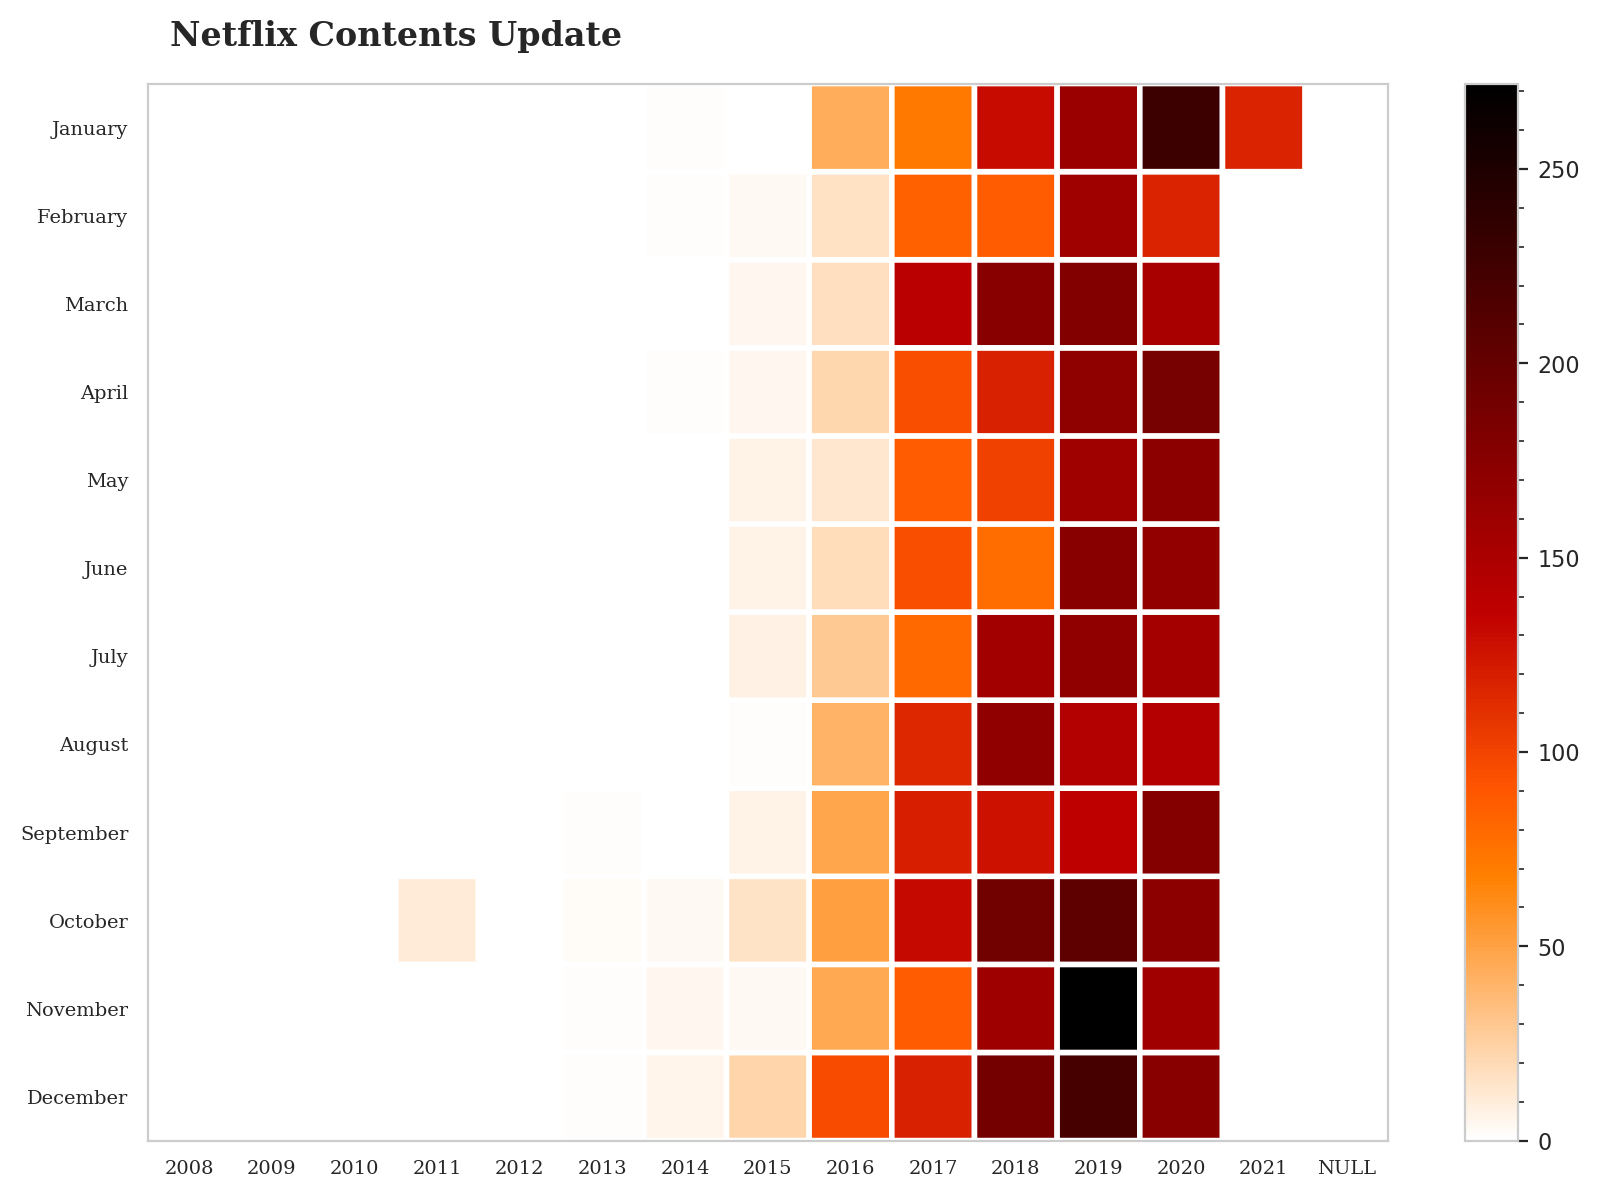

In [ ]:
netflix_date = data[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='gist_heat_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

In this incremental set, a simple linear graph would be nice. (so this is **baaaad** visualization & storytelling)

### Please be sure to leave a reference when using code or taking ideas in my visualizations.